In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
df = pd.read_csv('./GSE150150_raw_counts.csv')

In [3]:
columns = ["Trunk E9.5", "Trunk E10.5", "DRG E9.5", "DRG E10.5", "DRG E11.5", "DRG E12.5", "Cranio E12.5"]
idMappings = {
    "SS2_15_0085": "Trunk E9.5",
    "SS2_18_107": "Trunk E10.5",
    "SS2_18_108": "Trunk E10.5",
    "SS2_18_109": "Trunk E10.5",
    "SS2_16_767": "DRG E9.5",
    "SS2_17_435": "DRG E9.5",
    "SS2_16_688": "DRG E10.5",
    "SS2_16_769": "DRG E10.5",
    "SS2_17_432": "DRG E10.5",
    "SS2_17_433": "DRG E10.5",
    "SS2_16_385": "DRG E11.5",
    "SS2_16_384": "DRG E12.5",
    "SS2_15_0073": "Cranio E12.5",
    "SS2_15_0169": "Cranio E12.5"
}

In [4]:
print("Gene Count: ", len(df))
sampleRow = df.sample()
print("Sample Row: ", sampleRow)
print("Sample Gene: ", sampleRow.iloc[0,0])

Gene Count:  24582
Sample Row:          Gene  SS2_15_0073:A9_unique.bam  SS2_15_0073:A8_unique.bam  \
2350  Hoxd12                          0                          0   

      SS2_15_0073:A7_unique.bam  SS2_15_0073:A6_unique.bam  \
2350                          0                          0   

      SS2_15_0073:A5_unique.bam  SS2_15_0073:A4_unique.bam  \
2350                          0                          0   

      SS2_15_0073:A3_unique.bam  SS2_15_0073:A2_unique.bam  \
2350                          0                          0   

      SS2_15_0073:A10_unique.bam  ...  SS2_15_0085:P15_unique.bam  \
2350                           0  ...                           0   

      SS2_15_0085:P16_unique.bam  SS2_15_0085:P17_unique.bam  \
2350                           0                           0   

      SS2_15_0085:P18_unique.bam  SS2_15_0085:P19_unique.bam  \
2350                           0                           0   

      SS2_15_0085:P20_unique.bam  SS2_15_0085:P24_uniqu

In [5]:
import numbers
df.columns = [idMappings[col.split(":")[0]] if col.split(":")[0] in idMappings else col for col in df.columns]
dfParsed = df.groupby(df.columns, axis=1).apply(lambda x: x.mean(axis=1) if isinstance(x.iloc[0,0], numbers.Number) else x.iloc[:,0])
dfParsed = dfParsed[dfParsed.columns[5:].tolist() + dfParsed.columns[:5].tolist()]

print("Grouped Gene Count: ", len(dfParsed))
sampleRow = dfParsed.sample()
print("Grouped Sample Row: ", sampleRow)
print("Grouped Sample Gene: ", sampleRow.iloc[0,0])

Grouped Gene Count:  24582
Grouped Sample Row:          Gene  Trunk E10.5  Trunk E9.5  Cranio E12.5  DRG E10.5  DRG E11.5  \
2381  Zc3h15    29.746528   58.578125     42.153646  47.266927  51.109375   

      DRG E12.5   DRG E9.5  
2381  46.841146  54.032552  
Grouped Sample Gene:  Zc3h15


# Hierarchical Clustering

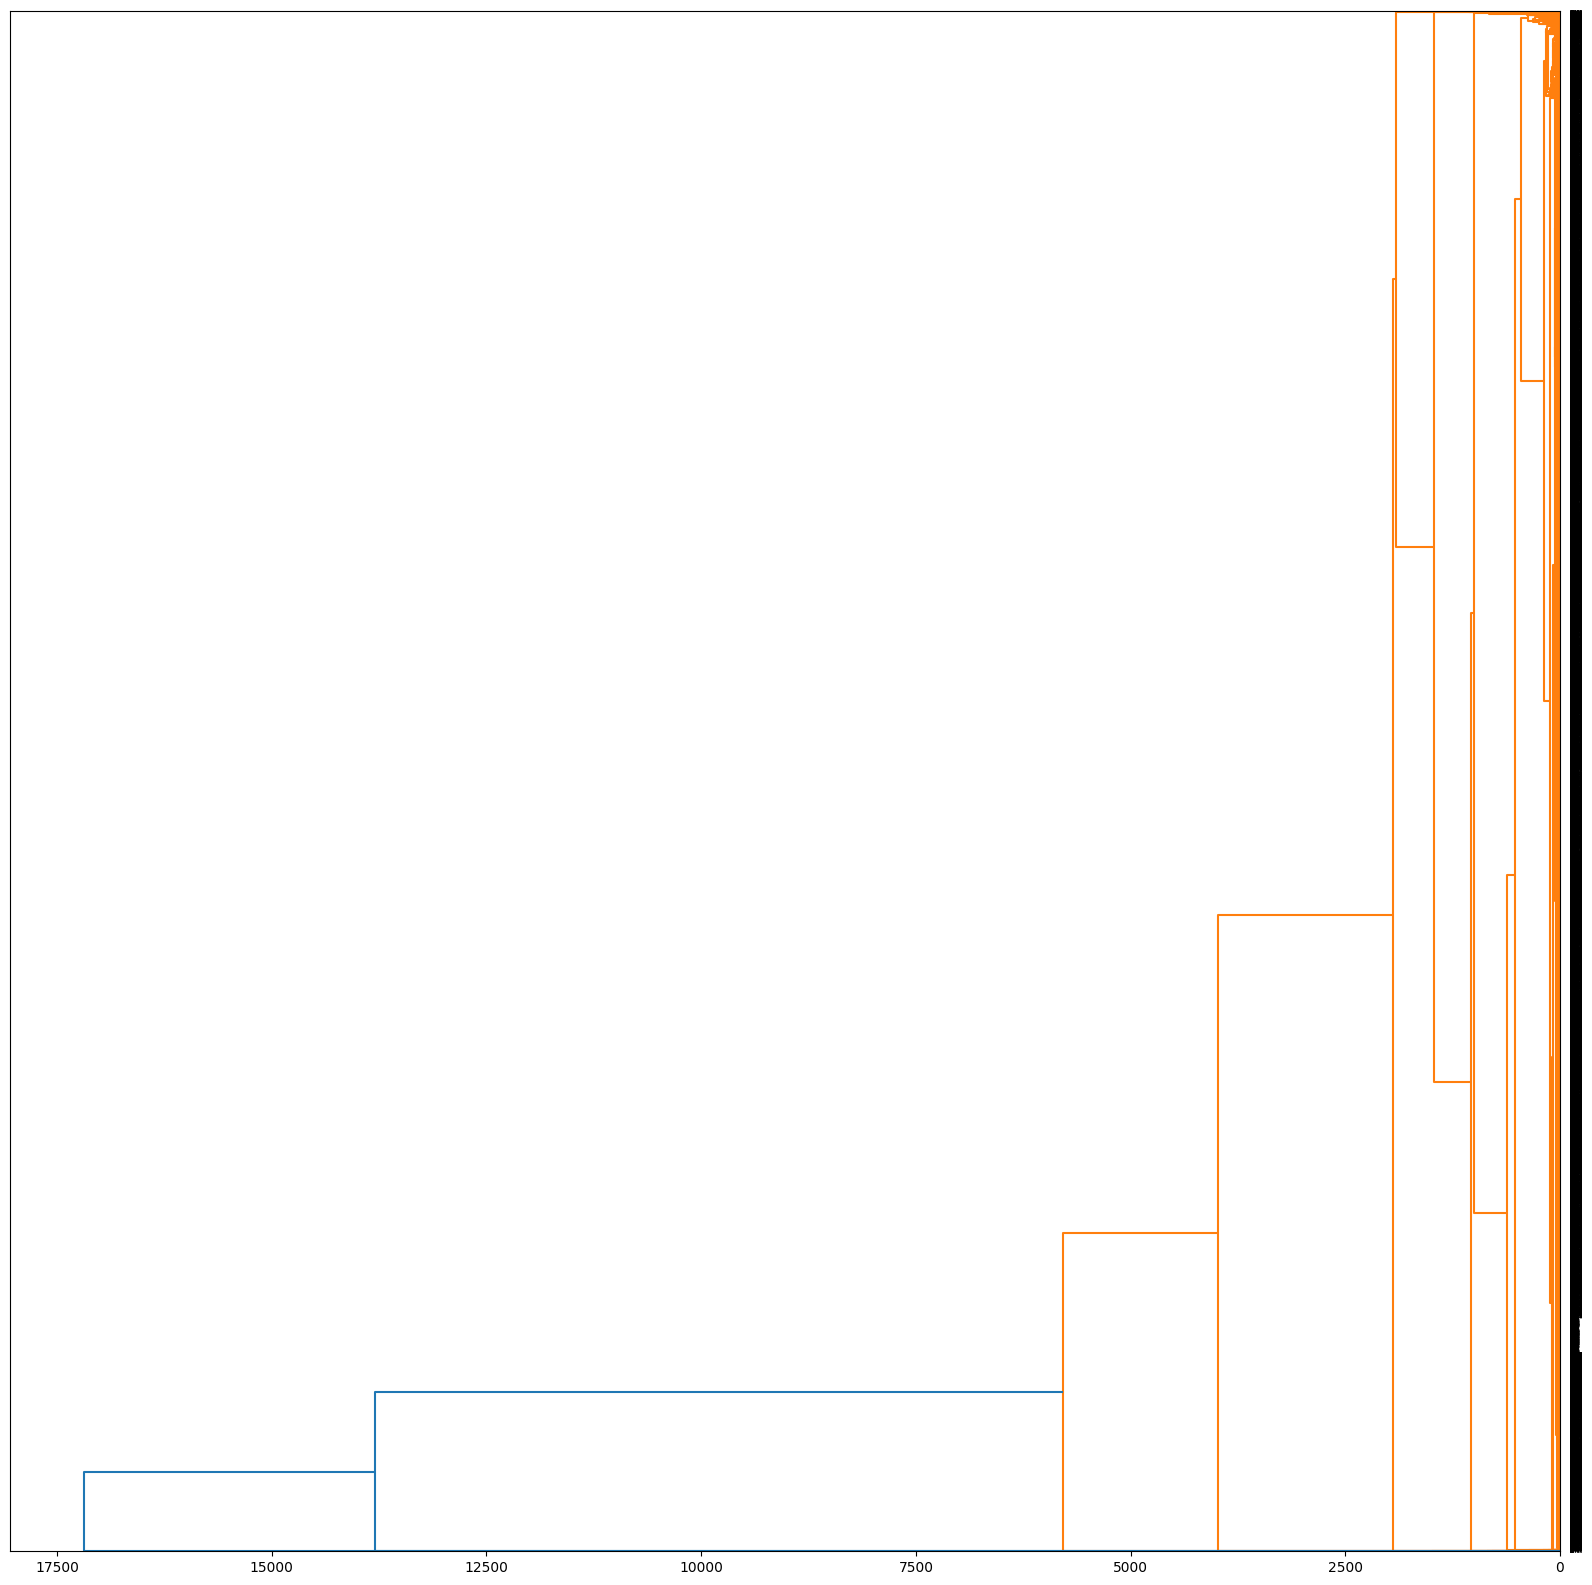

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram

genelessDf = dfParsed.drop(dfParsed.columns[0], axis=1)

distanceMatrix = linkage(genelessDf.values, method='centroid', metric='euclidean')

fig, ax = plt.subplots(figsize=(20, 20))
dendrogram(distanceMatrix, labels=genelessDf.index, orientation='left', ax=ax)
ax.tick_params(axis='y', labelsize=3)
plt.show()

In [18]:
from scipy.cluster.hierarchy import fcluster

hierClusters = fcluster(distanceMatrix, 35, criterion='distance')

print(hierClusters)

[ 1  9 14 ... 21 21 21]


In [22]:
Nociception = ["Ntrk1", "Runx1", "Prdm12", "Th", "Scn10a", "Syt13", "Stra6", "Gal", "Prdm8"]
Mechanoreception = ["Pdlim1","Mmd2", "Pou4f3", "Rnf144a", "Pou6f2", "Dio3", "Onecut3", "Tbx2", "Gpx3", "Ret"]
Mechanoreception1 = ["Pdlim1","Mmd2", "Pou4f3", "Rnf144a"]
Mechanoreception2 = ["Pou6f2", "Dio3", "Onecut3", "Tbx2", "Gpx3", "Ret"]
Proprioception = ["Ntrk3", "Runx3", "Mgst3", "Fam19a4", "Pcp4", "Grm3"]
Fate1 = ["Runx3", "Nfia"]
Fate2 = ["Pou6f2", "Nr5a2", "Hoxb5", "Pdlim1", "Egr1"]
Fate3 = ["Tcf15", "Pdlim1"]
Fate4 = ["Pou6f2", "Onecut3", "Dcc"]

NociceptionCluster = []
MechanoreceptionCluster = []
Mechanoreception1Cluster = []
Mechanoreception2Cluster = []
ProprioceptionCluster = []
Fate1Cluster = []
Fate2Cluster = []
Fate3Cluster = []
Fate4Cluster = []

for gene in Nociception:
    NociceptionCluster.append(hierClusters[dfParsed[dfParsed["Gene"] == gene].index[0]])

for gene in Mechanoreception:
    MechanoreceptionCluster.append(hierClusters[dfParsed[dfParsed["Gene"] == gene].index[0]])

for gene in Mechanoreception1:
    Mechanoreception1Cluster.append(hierClusters[dfParsed[dfParsed["Gene"] == gene].index[0]])

for gene in Mechanoreception2:
    Mechanoreception2Cluster.append(hierClusters[dfParsed[dfParsed["Gene"] == gene].index[0]])

for gene in Proprioception:
    ProprioceptionCluster.append(hierClusters[dfParsed[dfParsed["Gene"] == gene].index[0]])

for gene in Fate1:
    Fate1Cluster.append(hierClusters[dfParsed[dfParsed["Gene"] == gene].index[0]])

for gene in Fate2:
    Fate2Cluster.append(hierClusters[dfParsed[dfParsed["Gene"] == gene].index[0]])
    
for gene in Fate3:
    Fate3Cluster.append(hierClusters[dfParsed[dfParsed["Gene"] == gene].index[0]])

for gene in Fate4:
    Fate4Cluster.append(hierClusters[dfParsed[dfParsed["Gene"] == gene].index[0]])


print("Nociception Cluster: ", NociceptionCluster)
print("Mechanoreception Cluster: ", MechanoreceptionCluster)
print("Mechanoreception1 Cluster: ", Mechanoreception1Cluster)
print("Mechanoreception2 Cluster: ", Mechanoreception2Cluster)
print("Proprioception Cluster: ", ProprioceptionCluster)
print("Fate1 Cluster: ", Fate1Cluster)
print("Fate2 Cluster: ", Fate2Cluster)
print("Fate3 Cluster: ", Fate3Cluster)
print("Fate4 Cluster: ", Fate4Cluster)

Nociception Cluster:  [595, 21, 192, 46, 21, 162, 55, 46, 21]
Mechanoreception Cluster:  [182, 46, 21, 52, 21, 21, 21, 21, 33, 52]
Mechanoreception1 Cluster:  [182, 46, 21, 52]
Mechanoreception2 Cluster:  [21, 21, 21, 21, 33, 52]
Proprioception Cluster:  [164, 41, 52, 46, 52, 21]
Fate1 Cluster:  [41, 47]
Fate2 Cluster:  [21, 21, 52, 182, 190]
Fate3 Cluster:  [21, 182]
Fate4 Cluster:  [21, 21, 19]


In [23]:
nociceptionCluster = 21
mechanoreceptionCluster = 21
mechanoreception1Cluster = 52
mechanoreception2Cluster = 21
proprioceptionCluster = 52

nociceptionGenes = dfParsed[hierClusters == nociceptionCluster]["Gene"].values
mechanoreceptionGenes = dfParsed[hierClusters == mechanoreceptionCluster]["Gene"].values
mechanoreception1Genes = dfParsed[hierClusters == mechanoreception1Cluster]["Gene"].values
mechanoreception2Genes = dfParsed[hierClusters == mechanoreception2Cluster]["Gene"].values
proprioceptionGenes = dfParsed[hierClusters == proprioceptionCluster]["Gene"].values

# Save to csv
nociceptionGenesDf = pd.DataFrame(nociceptionGenes)
mechanoreceptionGenesDf = pd.DataFrame(mechanoreceptionGenes)
mechanoreception1GenesDf = pd.DataFrame(mechanoreception1Genes)
mechanoreception2GenesDf = pd.DataFrame(mechanoreception2Genes)
proprioceptionGenesDf = pd.DataFrame(proprioceptionGenes)

nociceptionGenesDf.to_csv("./data/hiernociceptionGenes.csv")
mechanoreceptionGenesDf.to_csv("./data/hiermechanoreceptionGenes.csv")
mechanoreception1GenesDf.to_csv("./data/hiermechanoreception1Genes.csv")
mechanoreception2GenesDf.to_csv("./data/hiermechanoreception2Genes.csv")
proprioceptionGenesDf.to_csv("./data/hierproprioceptionGenes.csv")

In [63]:
import seaborn as sns
from scipy.stats import zscore

genelessDfZscore = genelessDf.apply(zscore, axis=1)

print(genelessDfZscore.head())

   Trunk E10.5  Trunk E9.5  Cranio E12.5  DRG E10.5  DRG E11.5  DRG E12.5  \
0    -0.783250    0.624520      2.214625  -0.628463  -0.568398  -0.479115   
1    -0.684689    0.647273      2.217055  -0.593745  -0.579804  -0.535373   
2    -0.747398    0.624260      2.221137  -0.609961  -0.567595  -0.474798   
3    -0.686510    0.461022      2.289826  -0.583602  -0.524246  -0.478465   
4    -0.729419    0.428814      2.273103  -0.447264  -0.699805  -0.620835   

   DRG E9.5  
0 -0.379919  
1 -0.470717  
2 -0.445644  
3 -0.478024  
4 -0.204595  


/home/harin/.local/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/tmp/ipykernel_9691/1647717390.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nociIndex.append(genelessDfZscore[dfParsed["Gene"] == gene].index[0])


Text(0.5, 1.0, 'Nociception Cluster')

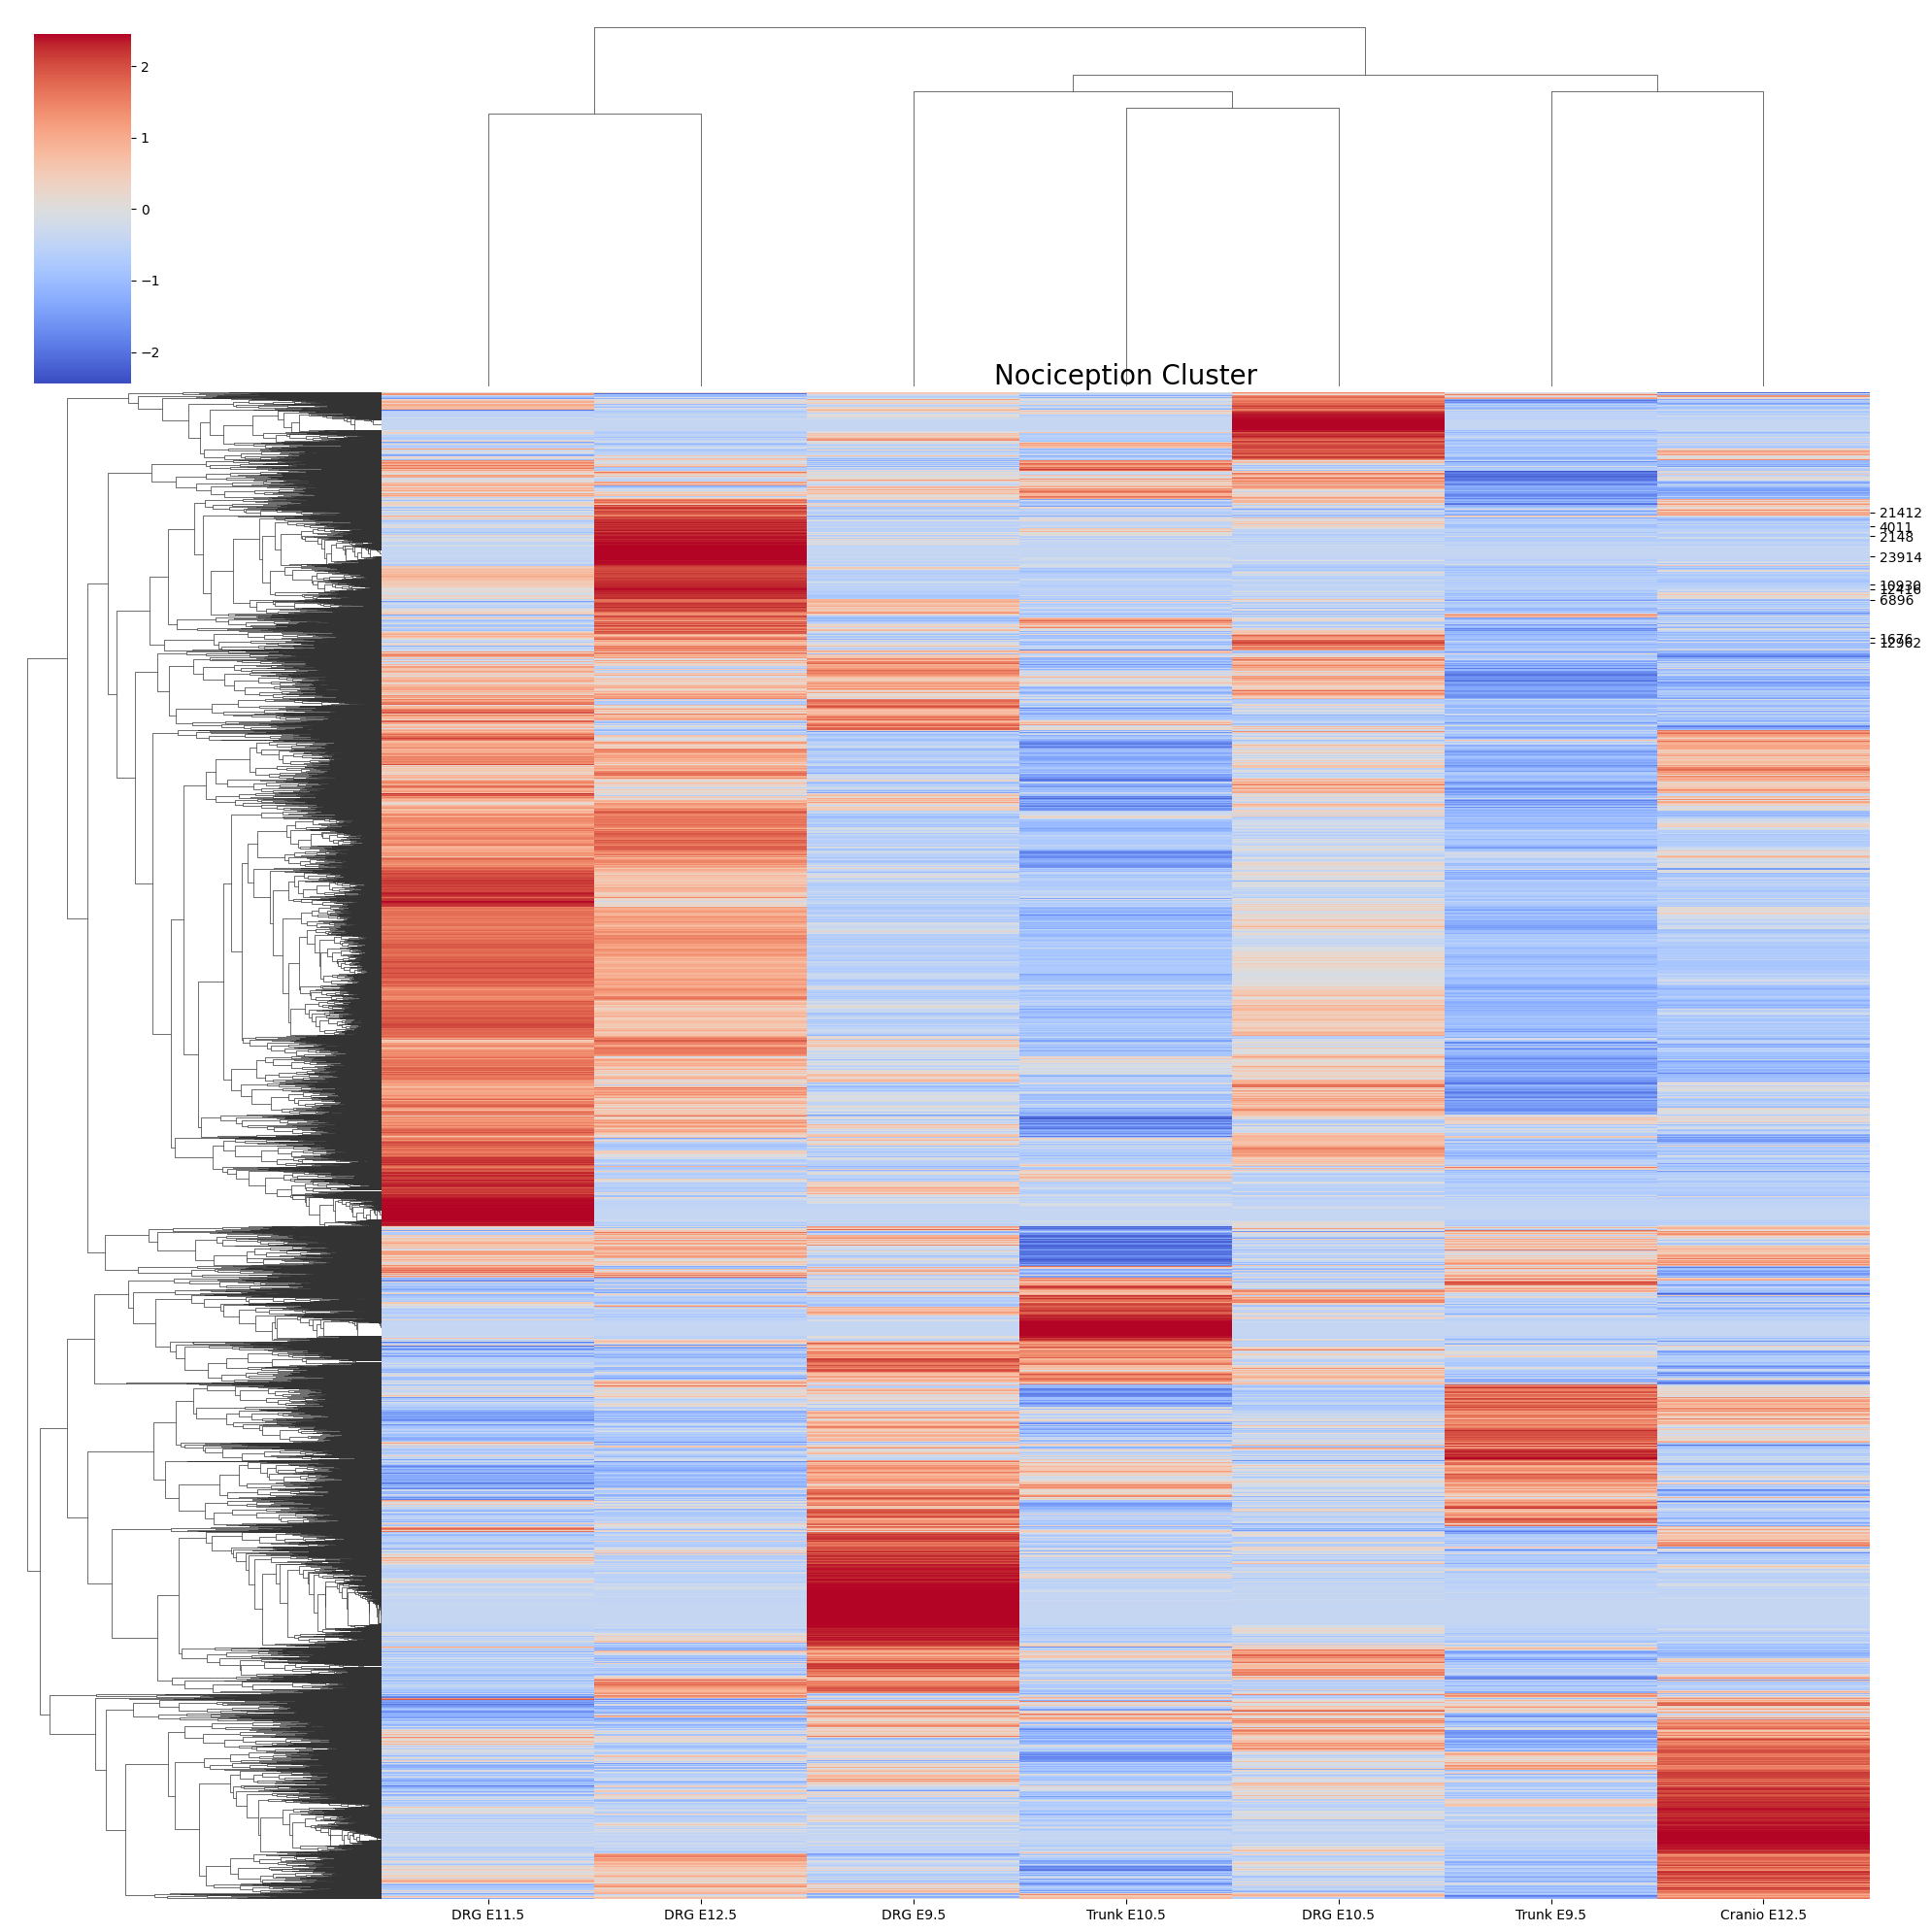

In [64]:
genelessDfZscore = genelessDfZscore.dropna(axis=0, how='any')
g = sns.clustermap(genelessDfZscore, cmap='coolwarm', figsize=(20, 20))

Nociception = ["Ntrk1", "Runx1", "Prdm12", "Th", "Scn10a", "Syt13", "Stra6", "Gal", "Prdm8"]

nociIndex = []
for gene in Nociception:
    nociIndex.append(genelessDfZscore[dfParsed["Gene"] == gene].index[0])

reordered_labels = genelessDfZscore.index[g.dendrogram_row.reordered_ind].tolist()
use_ticks = [reordered_labels.index(label) + .5 for label in nociIndex]

g.ax_heatmap.set(yticks=use_ticks, yticklabels=nociIndex)
g.ax_heatmap.set_title("Nociception Cluster", fontsize=20)

/home/harin/.local/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/tmp/ipykernel_9691/130162020.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mech1Index.append(genelessDfZscore[dfParsed["Gene"] == gene].index[0])


Text(0.5, 1.0, 'Mechanoreception1 Cluster')

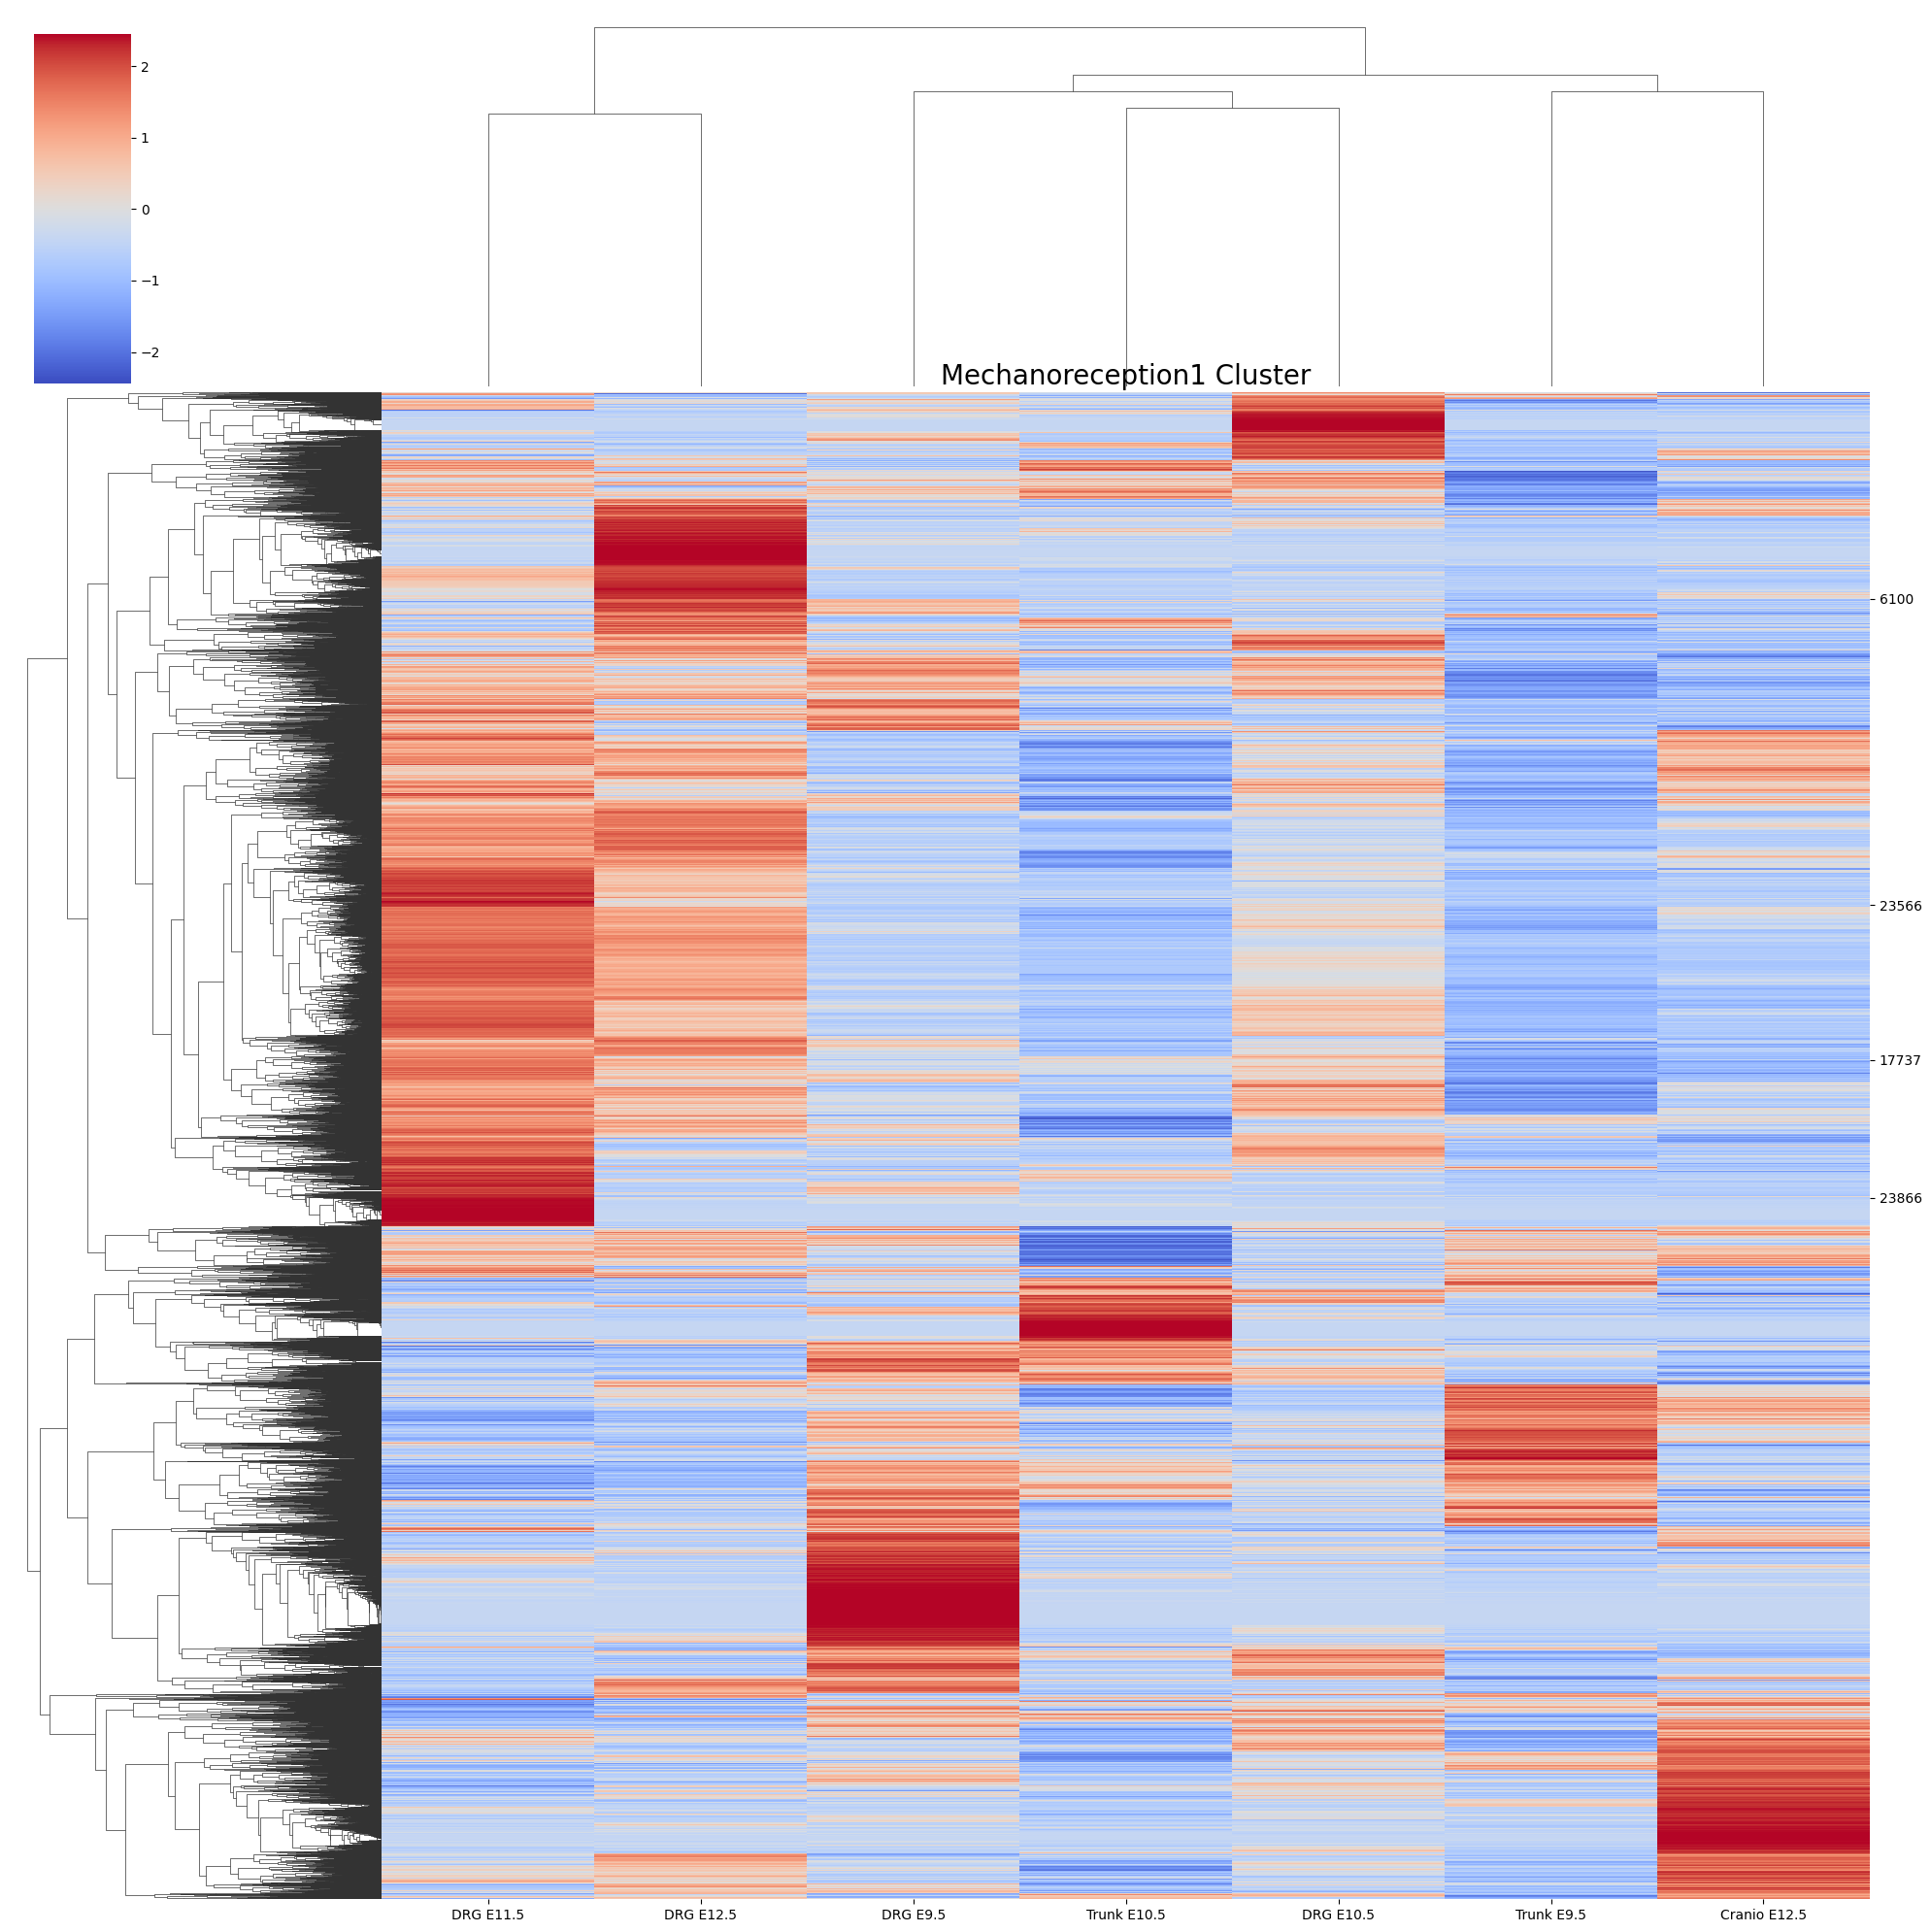

In [65]:
genelessDfZscore = genelessDfZscore.dropna(axis=0, how='any')
g = sns.clustermap(genelessDfZscore, cmap='coolwarm', figsize=(20, 20))

Mechanoreception1 = ["Pdlim1","Mmd2", "Pou4f3", "Rnf144a"]

mech1Index = []
for gene in Mechanoreception1:
    mech1Index.append(genelessDfZscore[dfParsed["Gene"] == gene].index[0])

reordered_labels = genelessDfZscore.index[g.dendrogram_row.reordered_ind].tolist()
use_ticks = [reordered_labels.index(label) + .5 for label in mech1Index]

g.ax_heatmap.set(yticks=use_ticks, yticklabels=mech1Index)
g.ax_heatmap.set_title("Mechanoreception1 Cluster", fontsize=20)

/home/harin/.local/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/tmp/ipykernel_9691/3967056008.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mech2Index.append(genelessDfZscore[dfParsed["Gene"] == gene].index[0])


Text(0.5, 1.0, 'Mechanoreception2 Cluster')

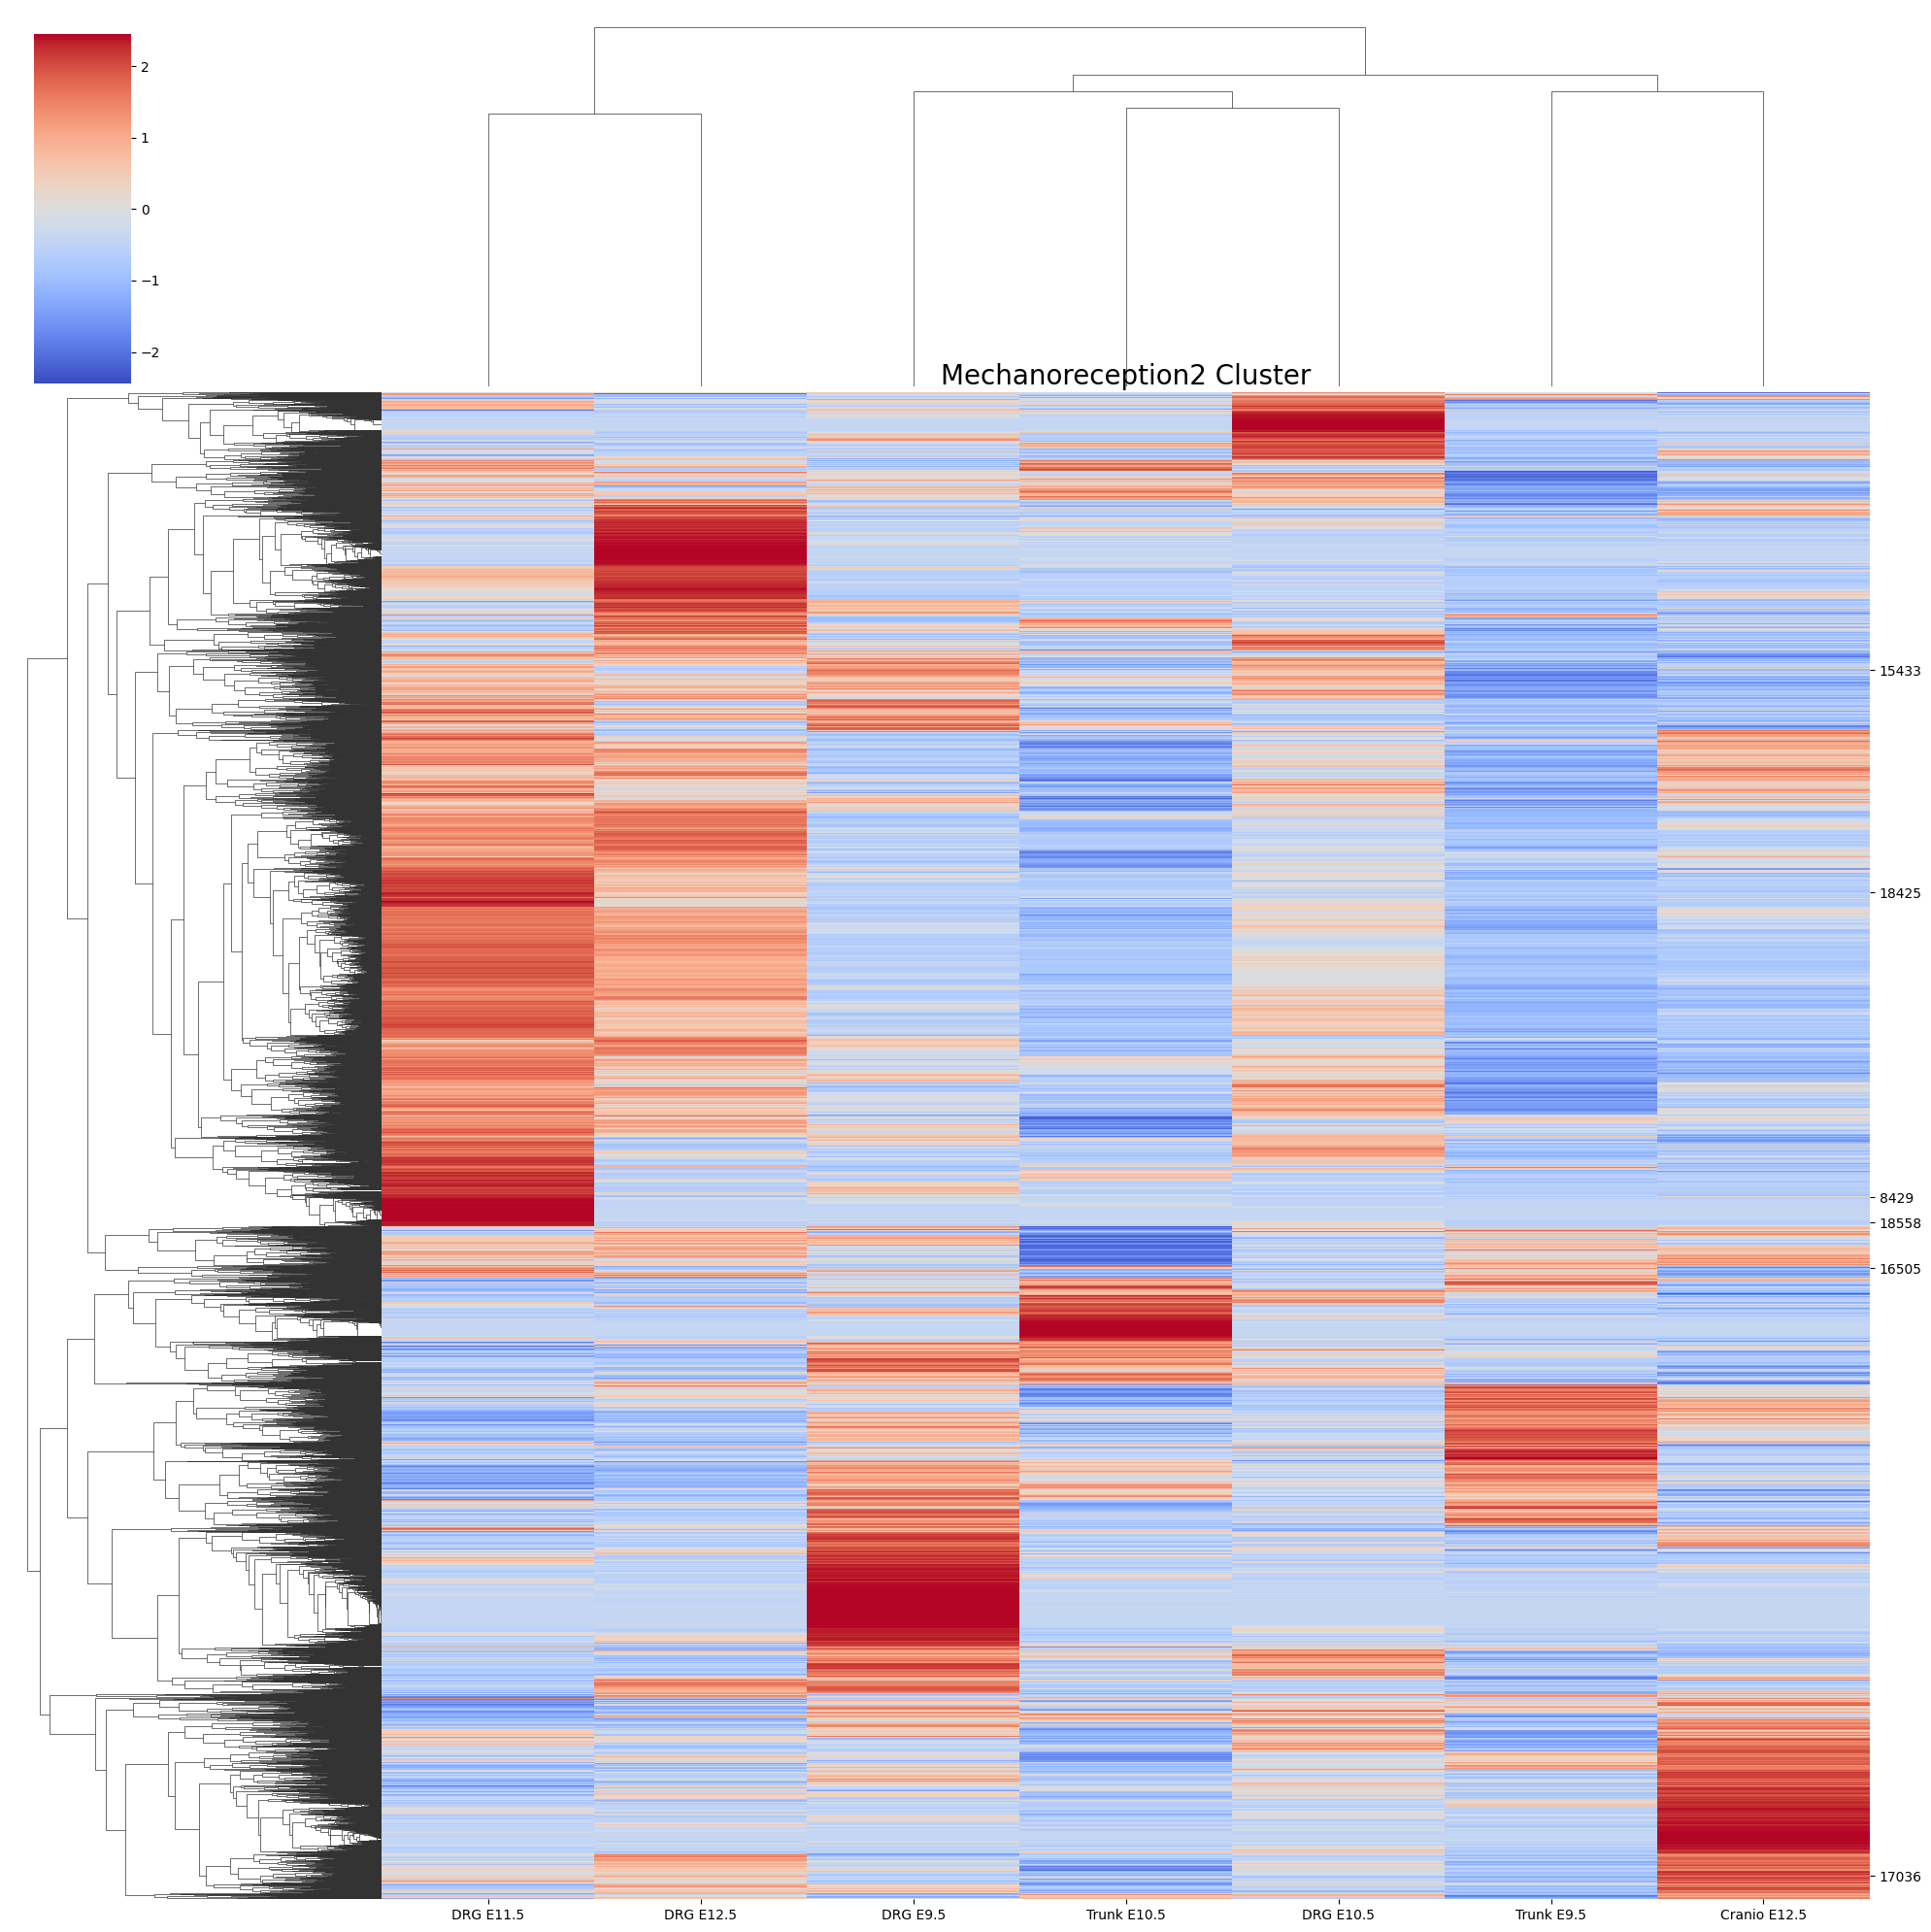

In [66]:
genelessDfZscore = genelessDfZscore.dropna(axis=0, how='any')
g = sns.clustermap(genelessDfZscore, cmap='coolwarm', figsize=(20, 20))

Mechanoreception2 = ["Pou6f2", "Dio3", "Onecut3", "Tbx2", "Gpx3", "Ret"]

mech2Index = []
for gene in Mechanoreception2:
    mech2Index.append(genelessDfZscore[dfParsed["Gene"] == gene].index[0])

reordered_labels = genelessDfZscore.index[g.dendrogram_row.reordered_ind].tolist()
use_ticks = [reordered_labels.index(label) + .5 for label in mech2Index]

g.ax_heatmap.set(yticks=use_ticks, yticklabels=mech2Index)
g.ax_heatmap.set_title("Mechanoreception2 Cluster", fontsize=20)

/home/harin/.local/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/tmp/ipykernel_9691/680991127.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  propIndex.append(genelessDfZscore[dfParsed["Gene"] == gene].index[0])


Text(0.5, 1.0, 'Proprioception Cluster')

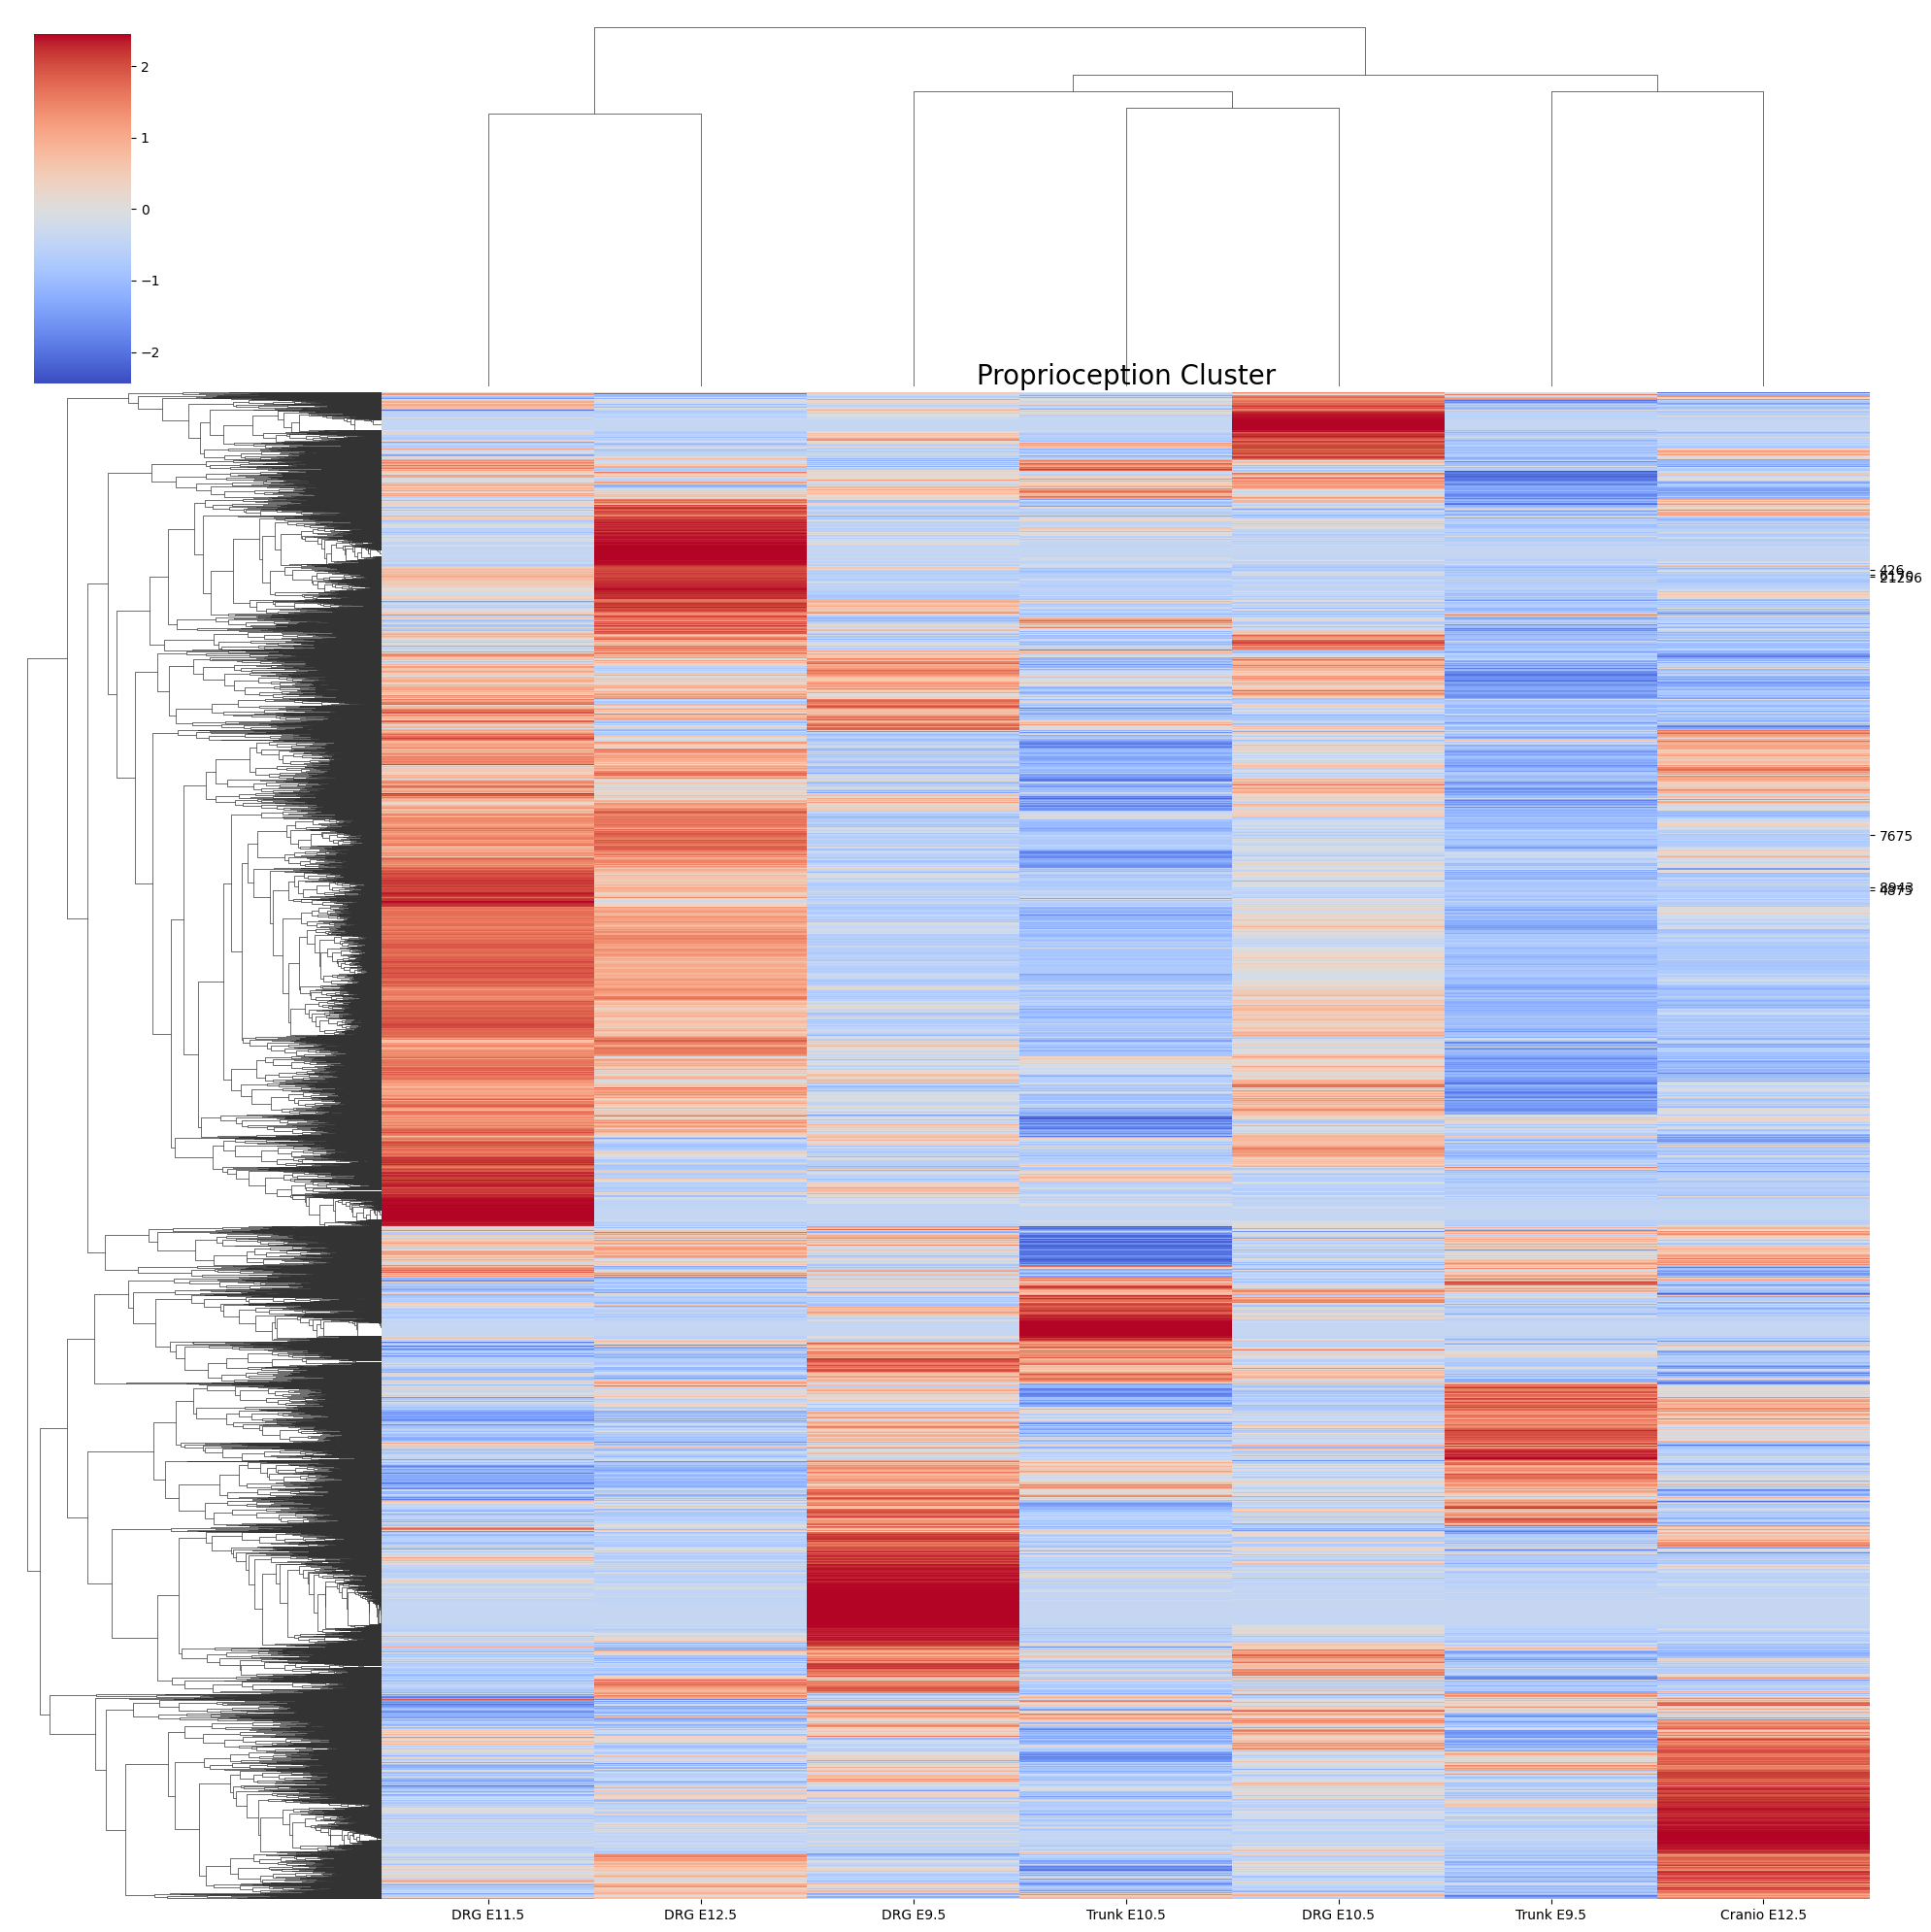

In [67]:
genelessDfZscore = genelessDfZscore.dropna(axis=0, how='any')
g = sns.clustermap(genelessDfZscore, cmap='coolwarm', figsize=(20, 20))

Proprioception = ["Ntrk3", "Runx3", "Mgst3", "Fam19a4", "Pcp4", "Grm3"]

propIndex = []
for gene in Proprioception:
    propIndex.append(genelessDfZscore[dfParsed["Gene"] == gene].index[0])

reordered_labels = genelessDfZscore.index[g.dendrogram_row.reordered_ind].tolist()
use_ticks = [reordered_labels.index(label) + .5 for label in propIndex]

g.ax_heatmap.set(yticks=use_ticks, yticklabels=propIndex)
g.ax_heatmap.set_title("Proprioception Cluster", fontsize=20)

/home/harin/.local/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/tmp/ipykernel_9691/2397127274.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fateIndex.append(genelessDfZscore[dfParsed["Gene"] == gene].index[0])


Text(0.5, 1.0, 'Fate1 Cluster')

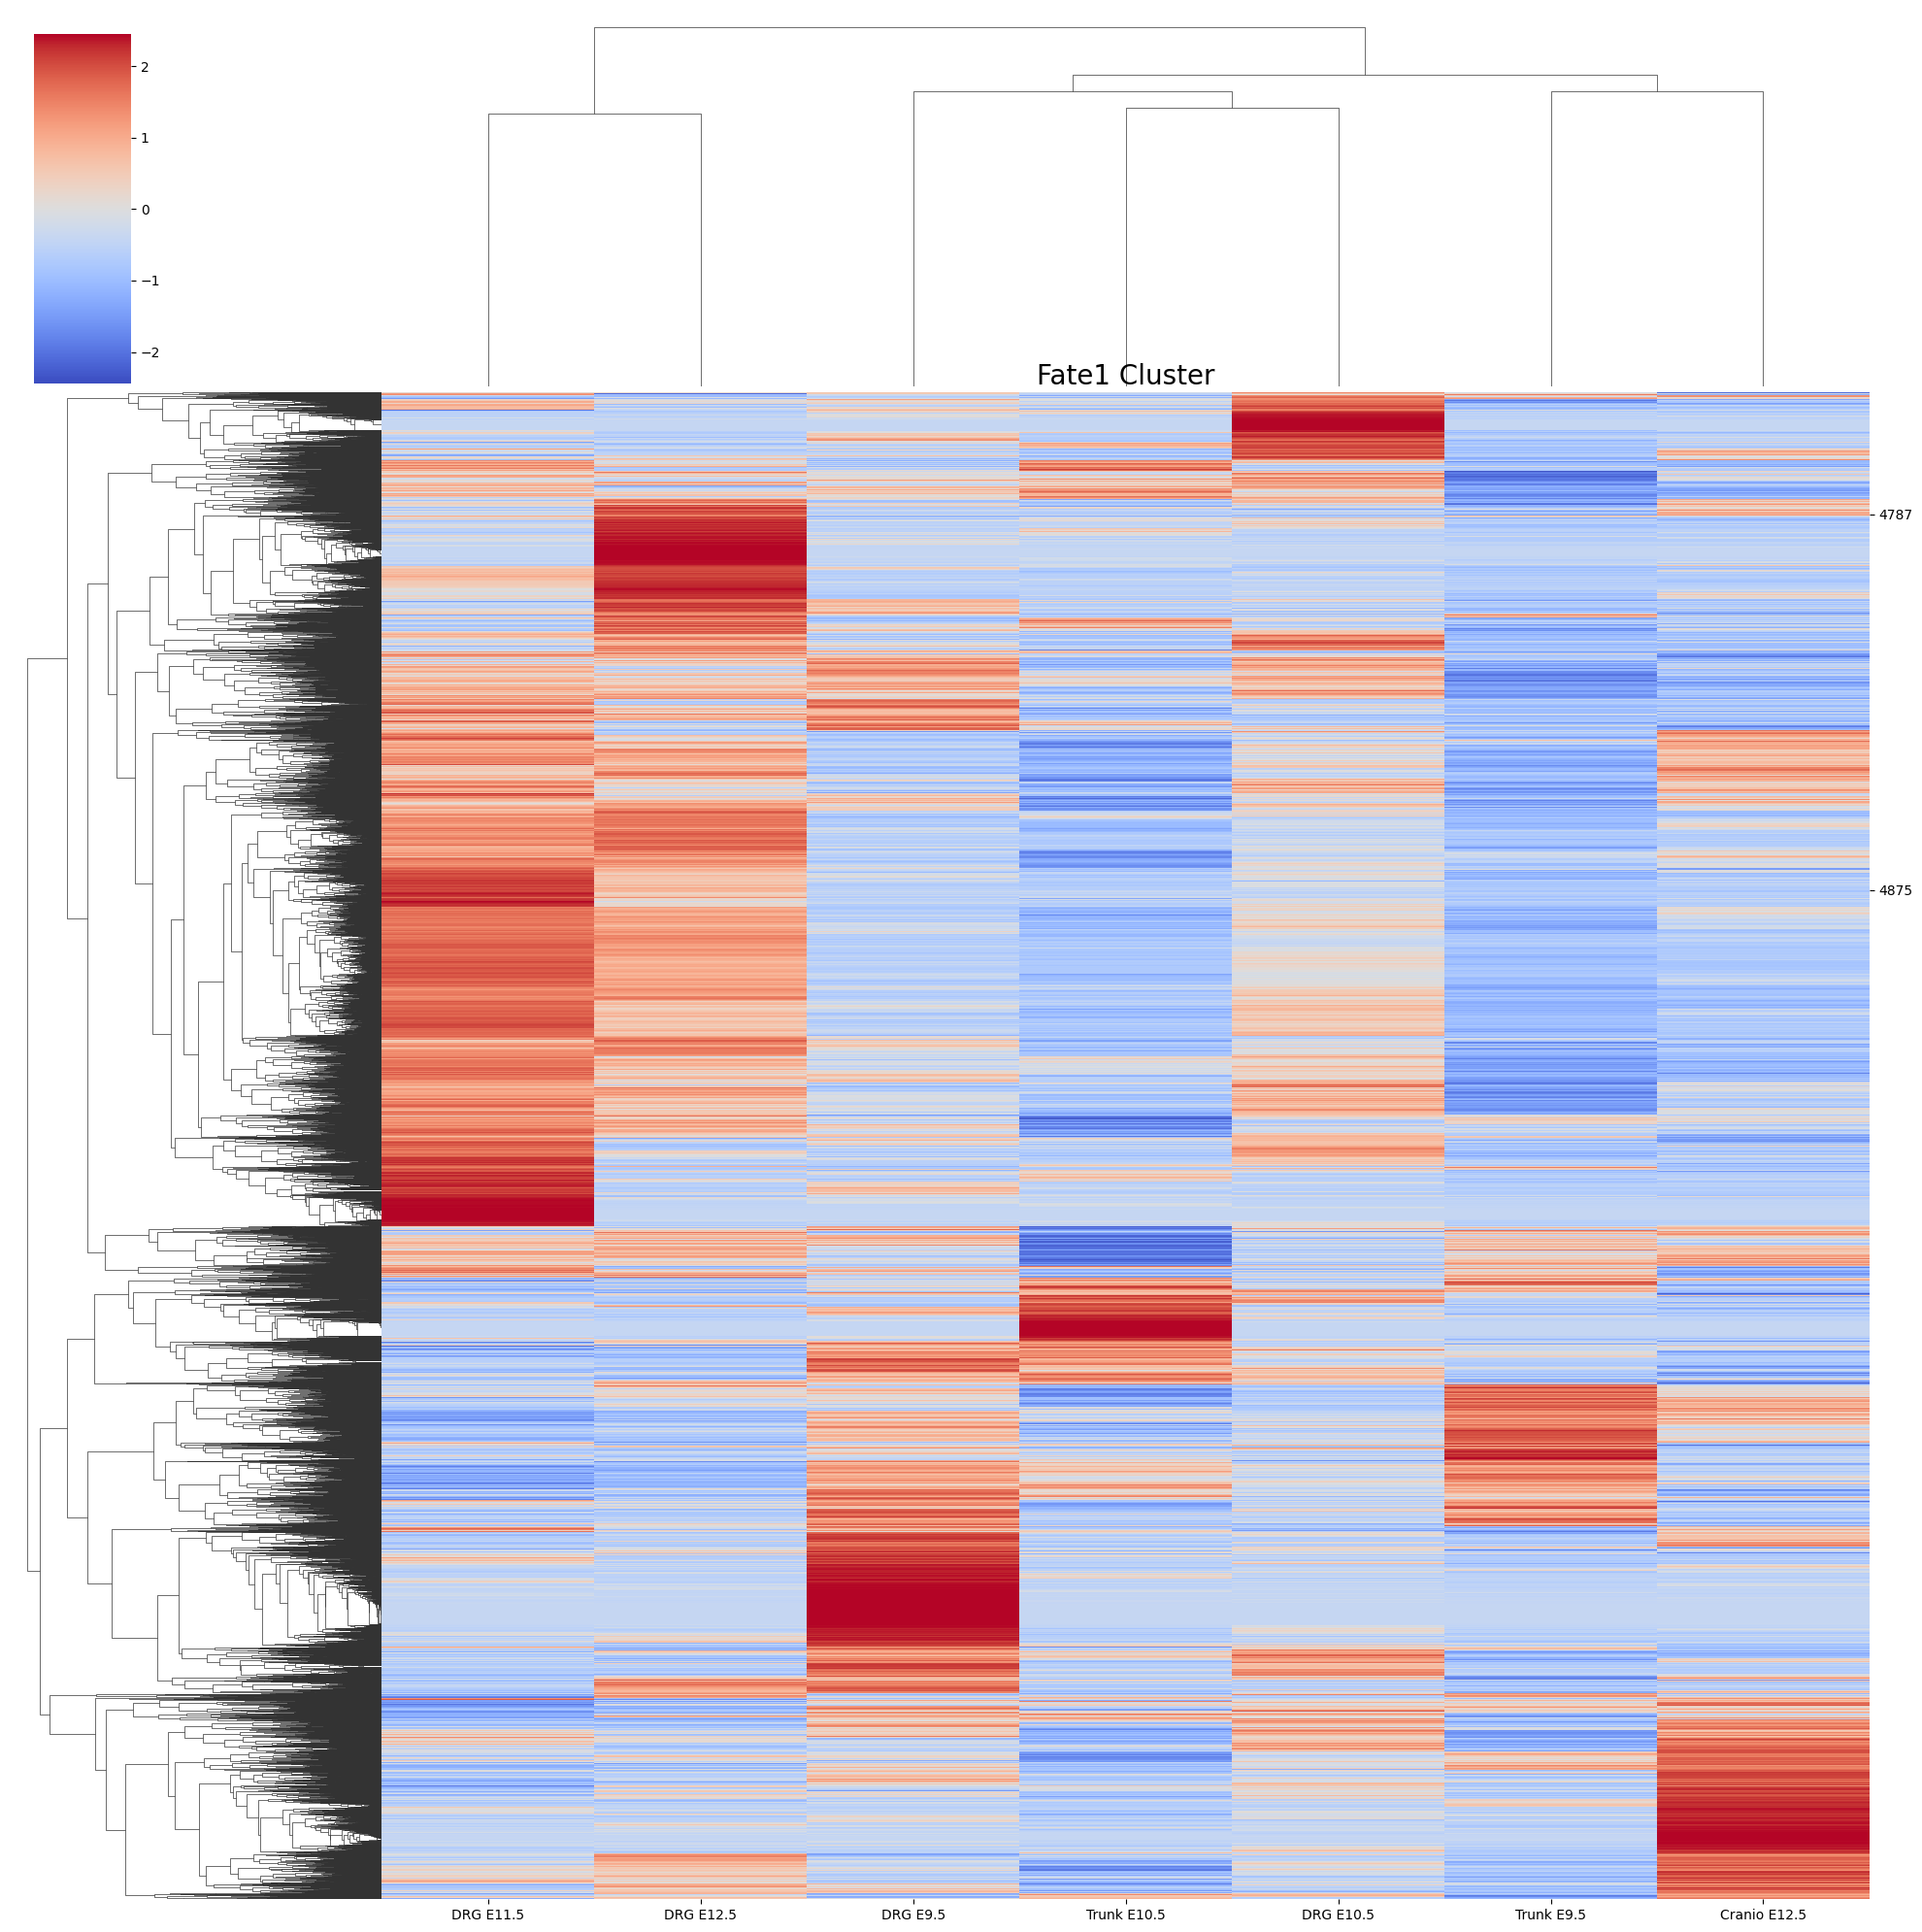

In [68]:
genelessDfZscore = genelessDfZscore.dropna(axis=0, how='any')
g = sns.clustermap(genelessDfZscore, cmap='coolwarm', figsize=(20, 20))

Fate1 = ["Runx3", "Nfia"]

fateIndex = []
for gene in Fate1:
    fateIndex.append(genelessDfZscore[dfParsed["Gene"] == gene].index[0])

reordered_labels = genelessDfZscore.index[g.dendrogram_row.reordered_ind].tolist()
use_ticks = [reordered_labels.index(label) + .5 for label in fateIndex]

g.ax_heatmap.set(yticks=use_ticks, yticklabels=fateIndex)
g.ax_heatmap.set_title("Fate1 Cluster", fontsize=20)

/home/harin/.local/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/tmp/ipykernel_9691/2498041581.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fateIndex.append(genelessDfZscore[dfParsed["Gene"] == gene].index[0])


Text(0.5, 1.0, 'Fate2 Cluster')

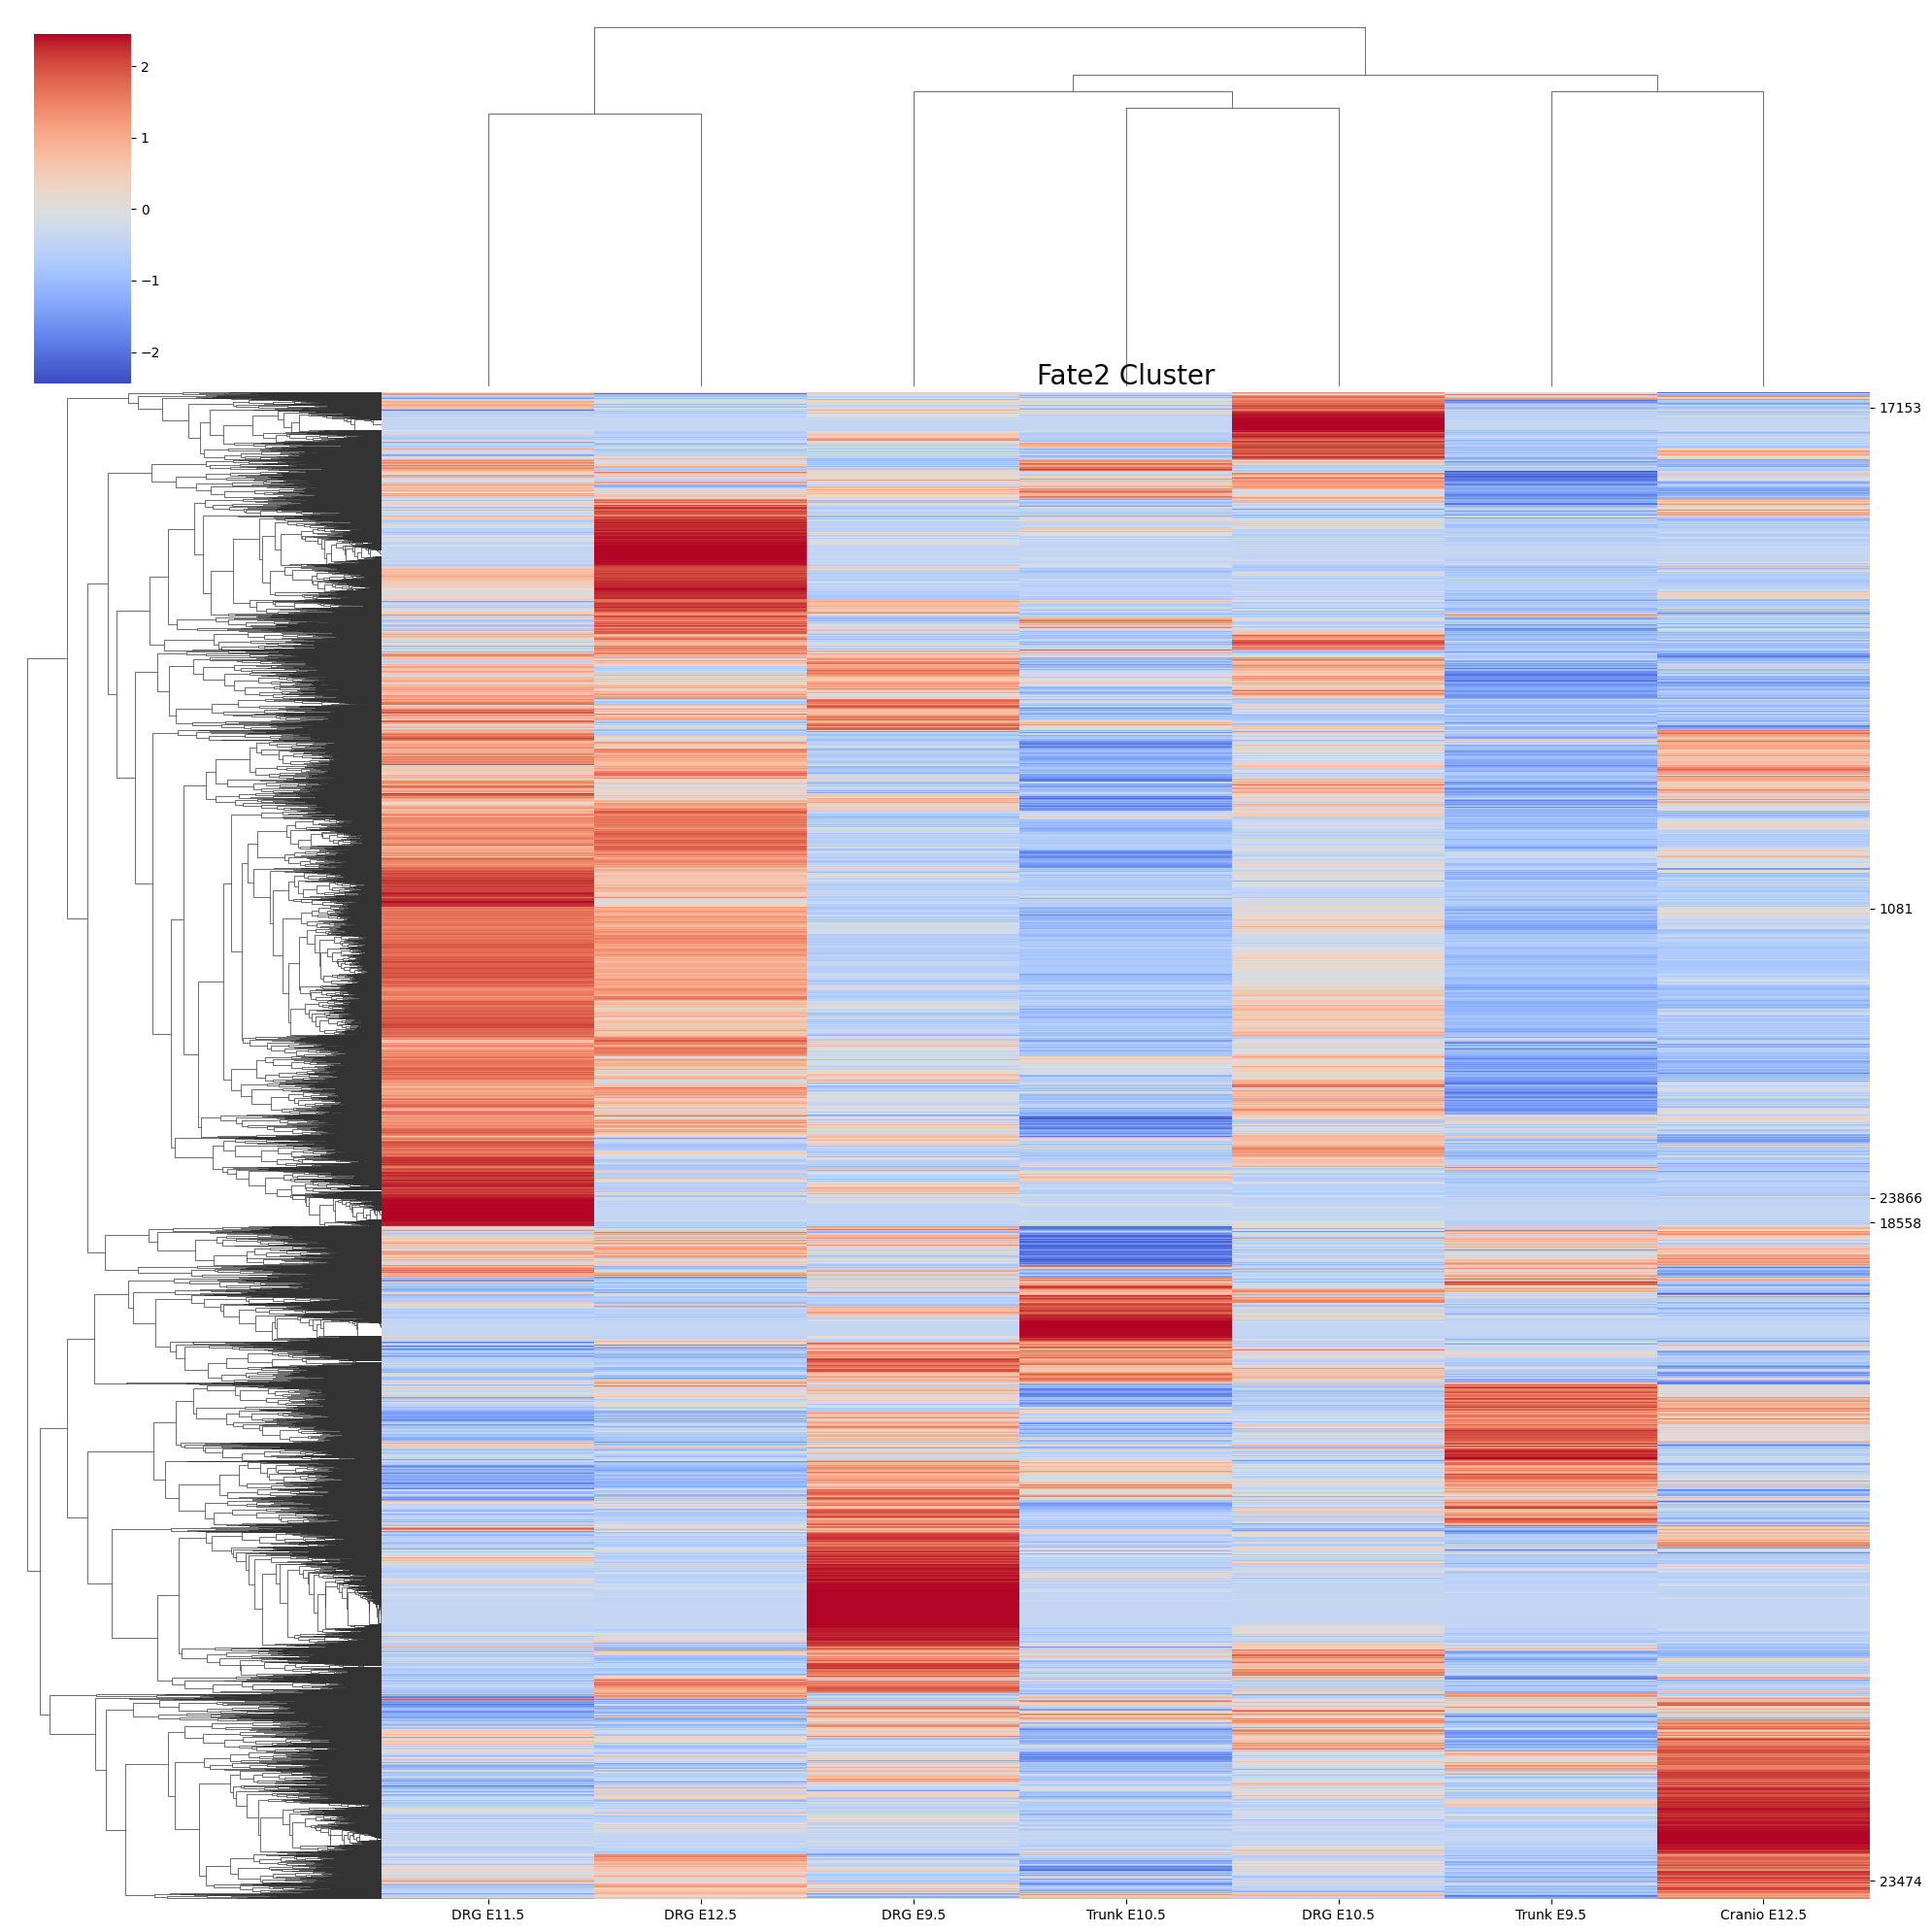

In [69]:
genelessDfZscore = genelessDfZscore.dropna(axis=0, how='any')
g = sns.clustermap(genelessDfZscore, cmap='coolwarm', figsize=(20, 20))

Fate2 = ["Pou6f2", "Nr5a2", "Hoxb5", "Pdlim1", "Egr1"]

fateIndex = []
for gene in Fate2:
    fateIndex.append(genelessDfZscore[dfParsed["Gene"] == gene].index[0])

reordered_labels = genelessDfZscore.index[g.dendrogram_row.reordered_ind].tolist()
use_ticks = [reordered_labels.index(label) + .5 for label in fateIndex]

g.ax_heatmap.set(yticks=use_ticks, yticklabels=fateIndex)
g.ax_heatmap.set_title("Fate2 Cluster", fontsize=20)

/home/harin/.local/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/tmp/ipykernel_9691/2411200850.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fateIndex.append(genelessDfZscore[dfParsed["Gene"] == gene].index[0])


Text(0.5, 1.0, 'Fate3 Cluster')

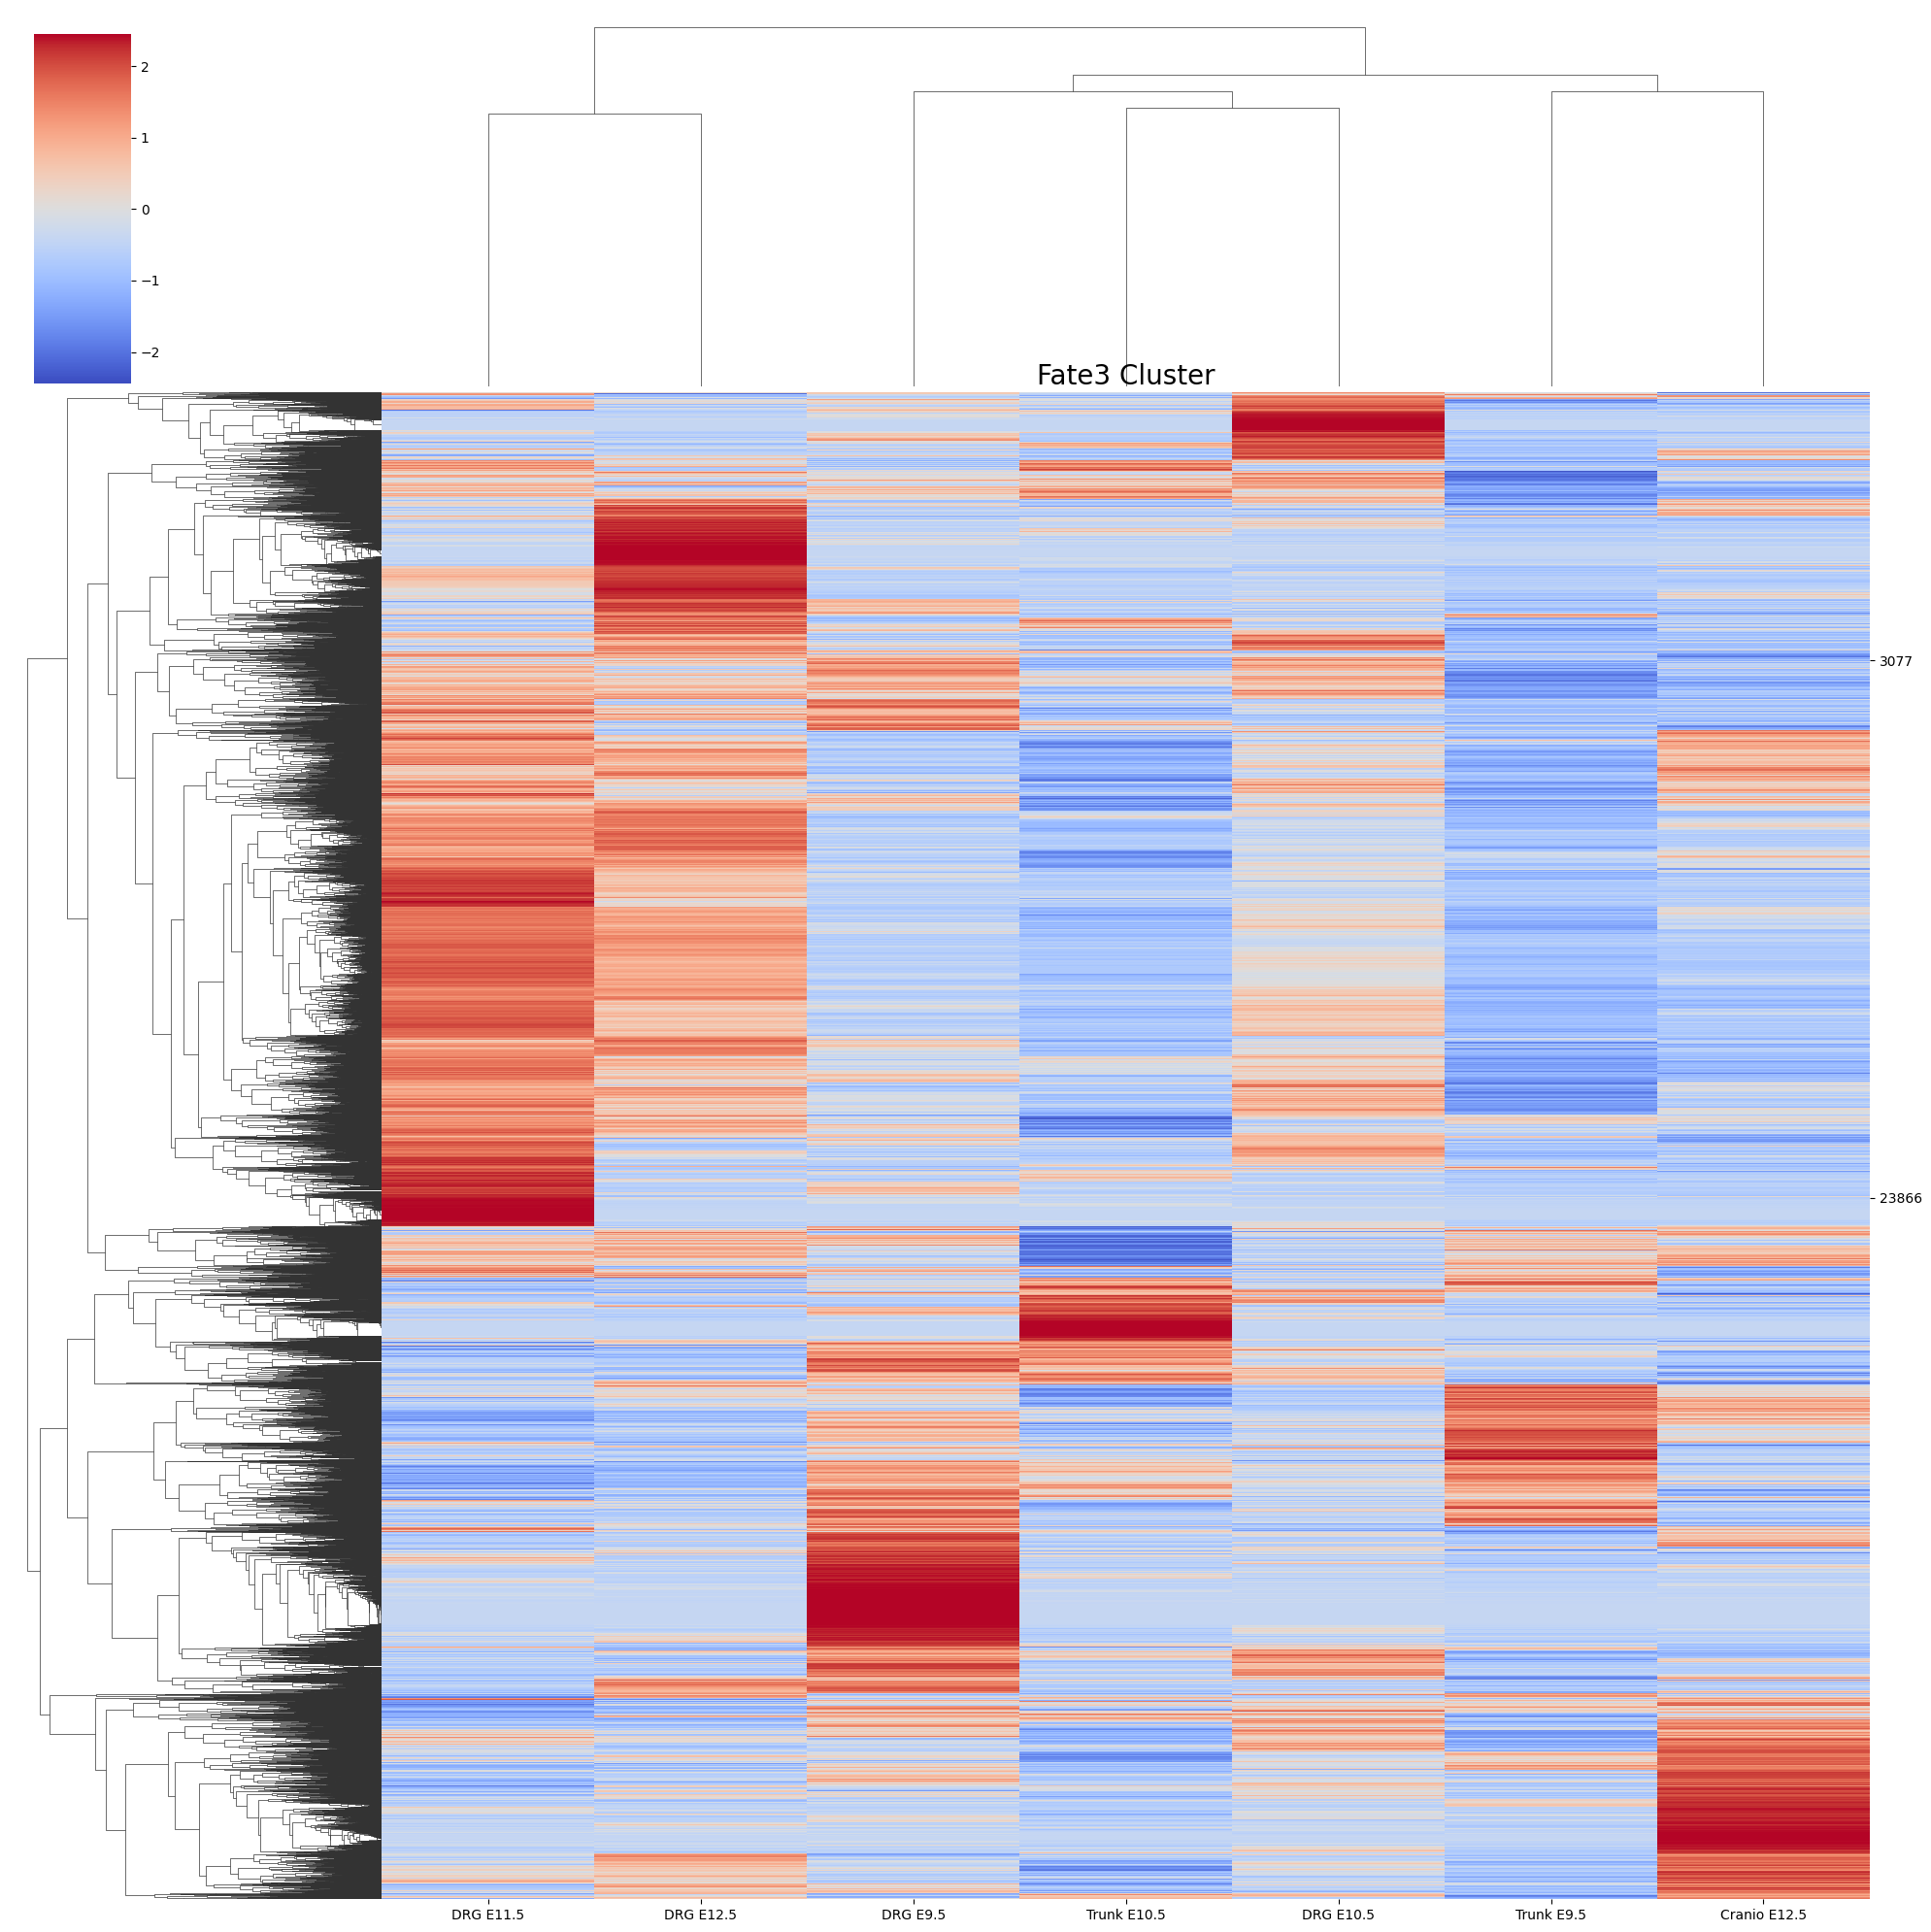

In [70]:
genelessDfZscore = genelessDfZscore.dropna(axis=0, how='any')
g = sns.clustermap(genelessDfZscore, cmap='coolwarm', figsize=(20, 20))

Fate3 = ["Tcf15", "Pdlim1"]

fateIndex = []
for gene in Fate3:
    fateIndex.append(genelessDfZscore[dfParsed["Gene"] == gene].index[0])

reordered_labels = genelessDfZscore.index[g.dendrogram_row.reordered_ind].tolist()
use_ticks = [reordered_labels.index(label) + .5 for label in fateIndex]

g.ax_heatmap.set(yticks=use_ticks, yticklabels=fateIndex)
g.ax_heatmap.set_title("Fate3 Cluster", fontsize=20)

/home/harin/.local/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/tmp/ipykernel_9691/2523619924.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fateIndex.append(genelessDfZscore[dfParsed["Gene"] == gene].index[0])


Text(0.5, 1.0, 'Fate4 Cluster')

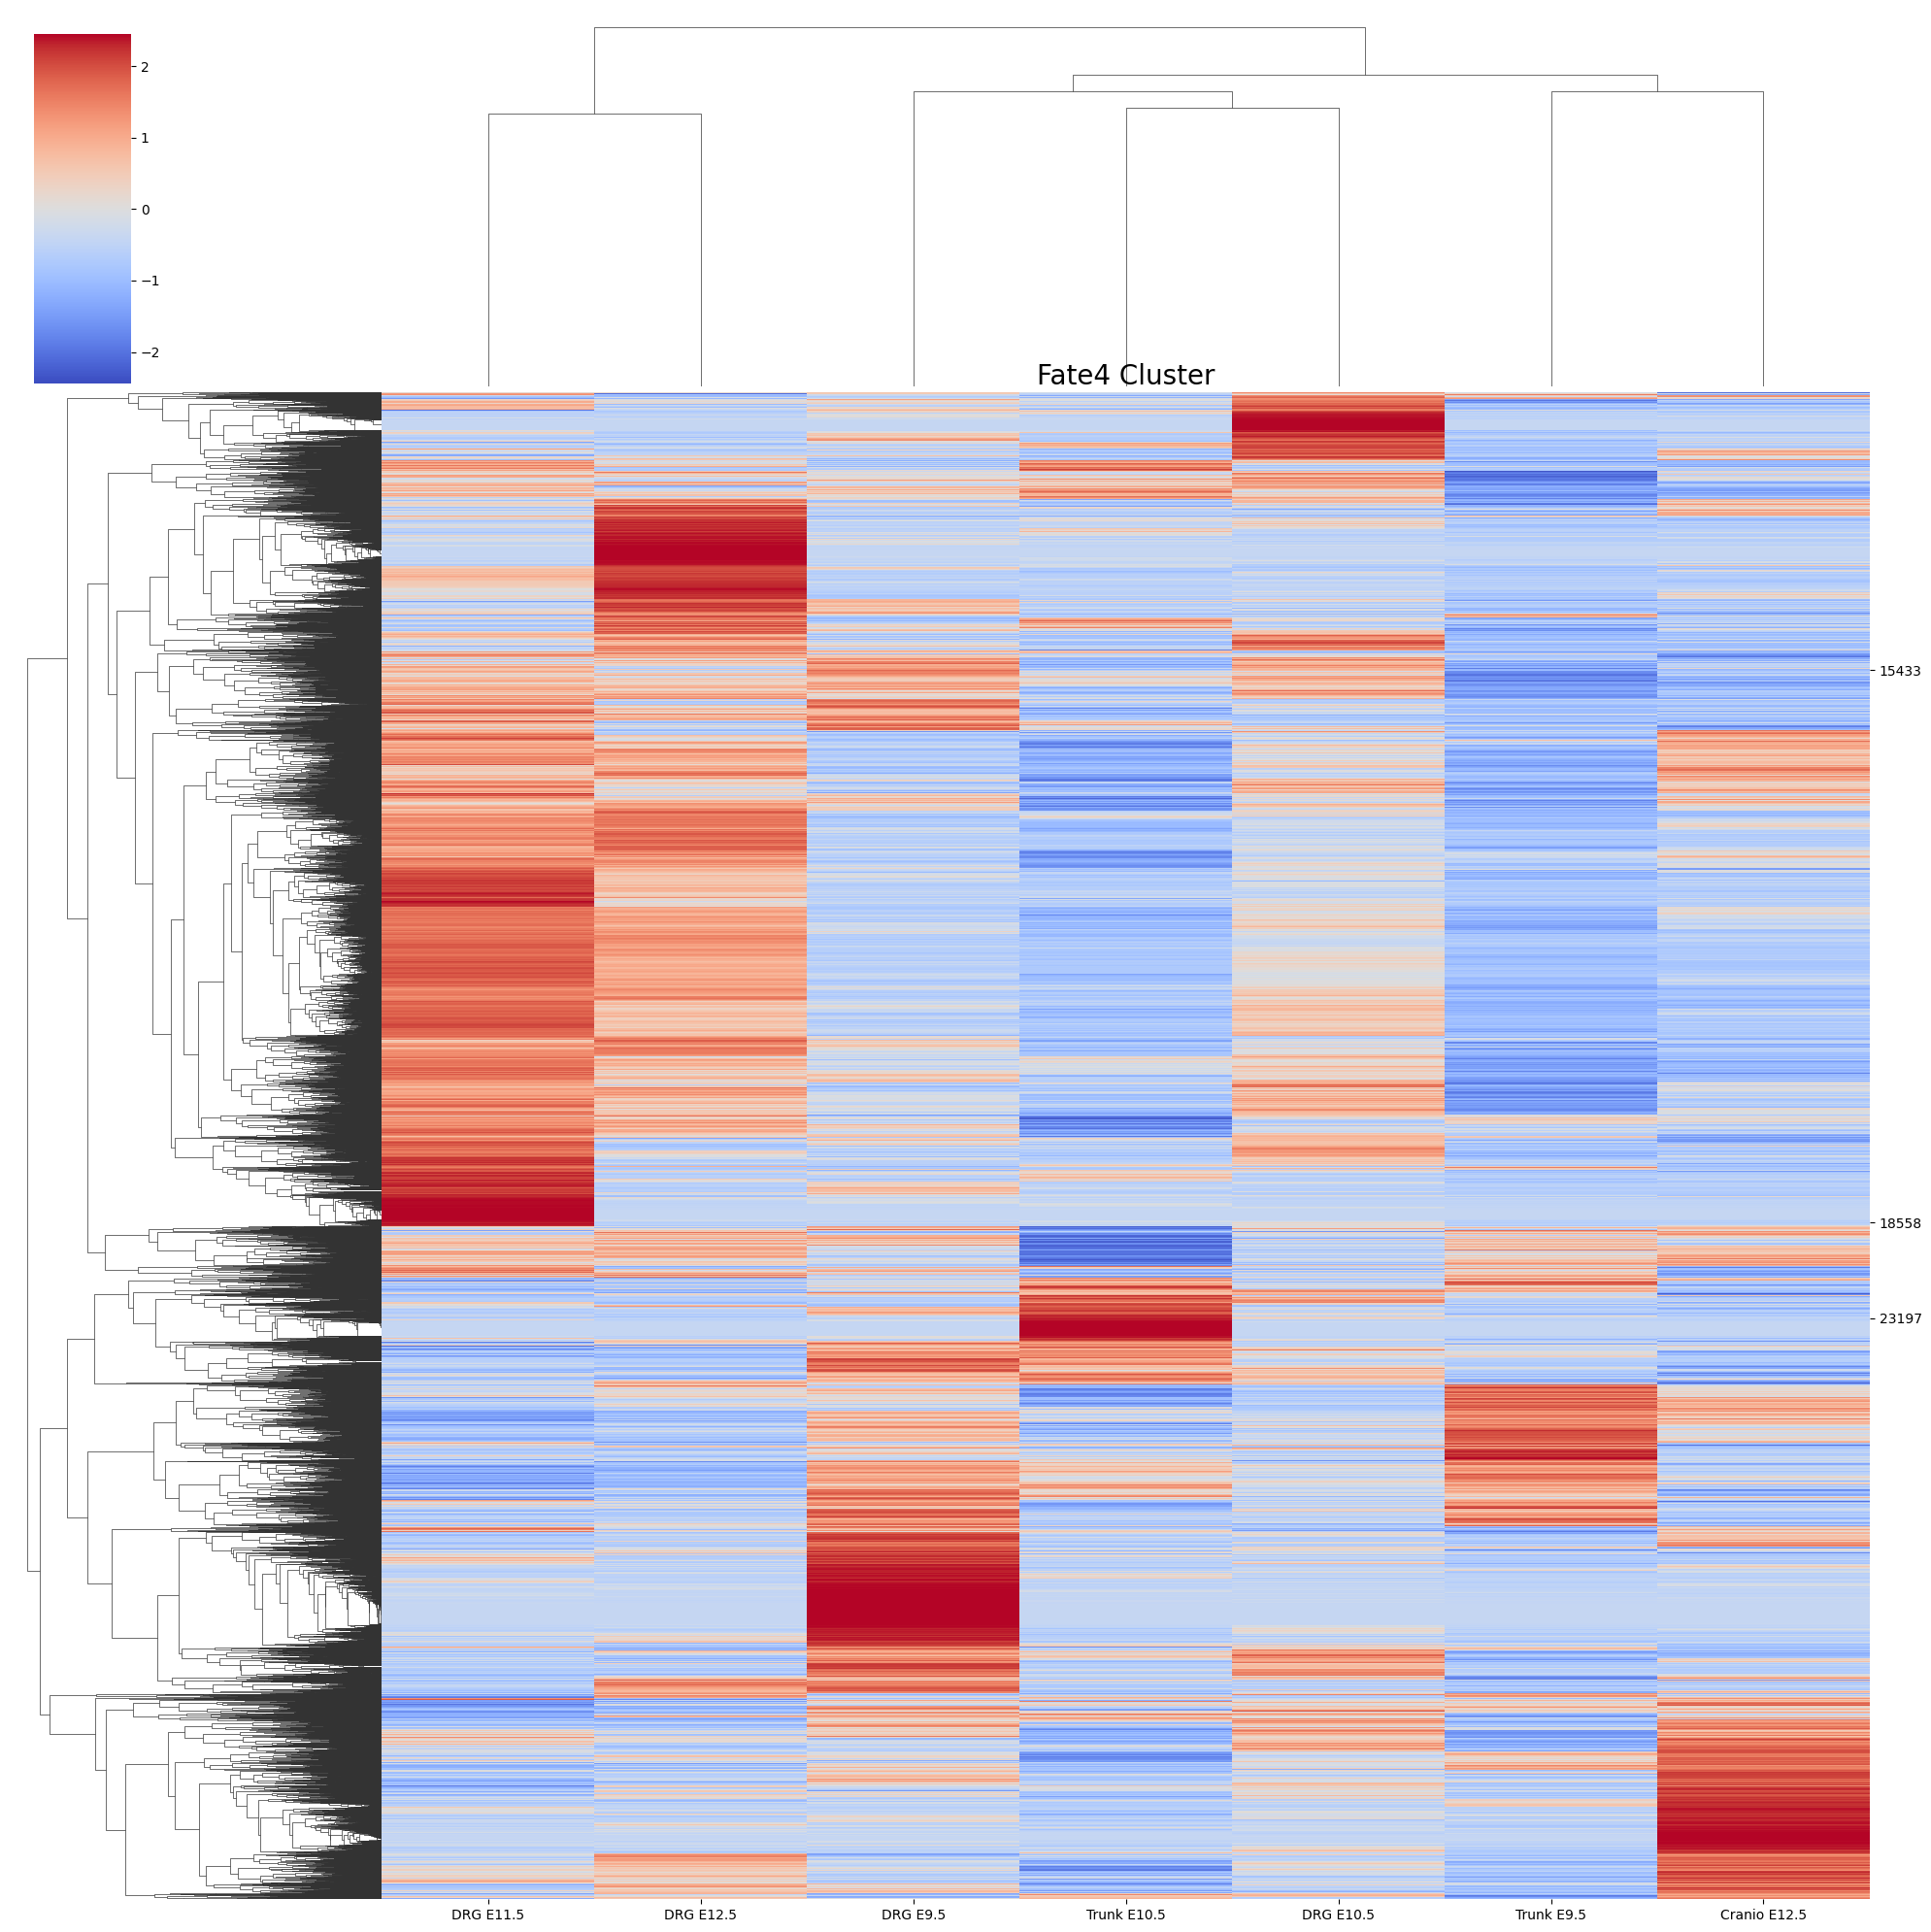

In [71]:
genelessDfZscore = genelessDfZscore.dropna(axis=0, how='any')
g = sns.clustermap(genelessDfZscore, cmap='coolwarm', figsize=(20, 20))

Fate4 = ["Pou6f2", "Onecut3", "Dcc"]

fateIndex = []
for gene in Fate4:
    fateIndex.append(genelessDfZscore[dfParsed["Gene"] == gene].index[0])

reordered_labels = genelessDfZscore.index[g.dendrogram_row.reordered_ind].tolist()
use_ticks = [reordered_labels.index(label) + .5 for label in fateIndex]

g.ax_heatmap.set(yticks=use_ticks, yticklabels=fateIndex)
g.ax_heatmap.set_title("Fate4 Cluster", fontsize=20)